<div class=text-center >
<h2>Gradiente</h2>
</div>

### Nombre: John Llanes

El problema de aprendizaje en las redes neuronales se formula en términos de la minimización de la función de error (o pérdida) asociada, y que notaremos en esta entrada por medio de f.

Normalmente, esta función está compuesta por dos términos, uno que evalúa cómo se ajusta la salida de la red neuronal al conjunto de datos de que disponemos, y que se denomina término de error, y otro que se denomina término de regularización, y que se utiliza para evitar el sobreaprendizaje por medio del control de la complejidad efectiva de la red neuronal.

Por supuesto, el valor de la función de error depende por completo de los parámetros de la red neuronal: los pesos sinápticos entre neuronas, y los bias asociados a ellas, que, como suele ser ya habitual, se pueden agrupar adecuadamente en un único vector de peso de la dimensión adecuada, que denotaremos por w. En este sentido, podemos escribir f(w) para indicar que el valor del error que comete la red neuronal depende de los pesos asociados a la misma. Con esta formalización, nuestro objetivo es encontrar el valor w∗ para el que se obtiene un mínimo global de la función f, convirtiendo el problema de aprendizaje en un problema de optimización, como va siendo habitual.

En general, la función de error es una función no lineal, por lo que no disponemos de algoritmos sencillos y exactos para encontrar sus mínimos. En consecuencia, tendremos que hacer uso de una búsqueda a través del espacio de parámetros que, idealmente, se aproxime de forma iterada a a un (error) mínimo de la red para los parámetros adecuados.

![Alt Text](http://www.cs.us.es/~fsancho/images/2017-02/gds.gif)

El Descenso del Gradiente es el algoritmo de entrenamiento más simple y también el más extendido y conocido. Solo hace uso del vector gradiente, y por ello se dice que es un método de primer orden.

Este método para construir el punto wi+1 a partir de wi se traslada este punto en la dirección de entrenamiento di=−gi. 

Es decir:

$ \w_{i + 1} = w_i - g_i \nu_i

Donde el parámetro ν
se denomina tasa de entrenamiento, que puede fijarse a priori o calcularse mediante un proceso de optimización unidimensional a lo largo de la dirección de entrenamiento para cada uno de los pasos (aunque esta última opción es preferible, a menudo se usa un valor fijo, νi=ν

con el fin de simplificar el proceso).

Aunque es muy sencillo, este algoritmo tiene el gran inconveniente de que, para funciones de error con estructuras con valles largos y estrechos, requiere muchas iteraciones. Se debe a que, aunque la dirección elegida es en la que la función de error disminuye más rápidamente, esto no significa que necesariamente produzca la convergencia más rápida.

![Alt Text](http://www.cs.us.es/~fsancho/images/2017-02/gradient_descent.gif)


In [1]:
import numpy as np 
import random 

# m denotes the number of examples here, not the number of features 
def gradientDescent(x, y, theta, alpha, m, numIterations): 
    xTrans = x.transpose() 
    for i in range(0, numIterations): 
     hypothesis = np.dot(x, theta) 
     loss = hypothesis - y 
     # avg cost per example (the 2 in 2*m doesn't really matter here. 
     # But to be consistent with the gradient, I include it) 
     cost = np.sum(loss ** 2)/(2 * m) 
     print("Iteration %d | Cost: %f" % (i, cost)) 
     # avg gradient per example 
     gradient = np.dot(xTrans, loss)/m 
     # update 
     theta = theta - alpha * gradient 
    return theta 


def genData(numPoints, bias, variance): 
    x = np.zeros(shape=(numPoints, 2)) 
    y = np.zeros(shape=numPoints) 
    # basically a straight line 
    for i in range(0, numPoints): 
     # bias feature 
     x[i][0] = 1 
     x[i][1] = i 
     # our target variable 
     y[i] = (i + bias) + random.uniform(0, 1) * variance 
    return x, y 

# gen 100 points with a bias of 25 and 10 variance as a bit of noise 
x, y = genData(100, 25, 10) 
m, n = np.shape(x) 
numIterations= 100000 
alpha = 0.0005 
theta = np.ones(n) 
theta = gradientDescent(x, y, theta, alpha, m, numIterations) 
print(theta) 

Iteration 0 | Cost: 427.007100
Iteration 1 | Cost: 238.512273
Iteration 2 | Cost: 160.776429
Iteration 3 | Cost: 128.708970
Iteration 4 | Cost: 115.471600
Iteration 5 | Cost: 109.998297
Iteration 6 | Cost: 107.726295
Iteration 7 | Cost: 106.774263
Iteration 8 | Cost: 106.366488
Iteration 9 | Cost: 106.183127
Iteration 10 | Cost: 106.092299
Iteration 11 | Cost: 106.039630
Iteration 12 | Cost: 106.002697
Iteration 13 | Cost: 105.972258
Iteration 14 | Cost: 105.944499
Iteration 15 | Cost: 105.917850
Iteration 16 | Cost: 105.891661
Iteration 17 | Cost: 105.865667
Iteration 18 | Cost: 105.839757
Iteration 19 | Cost: 105.813885
Iteration 20 | Cost: 105.788033
Iteration 21 | Cost: 105.762192
Iteration 22 | Cost: 105.736361
Iteration 23 | Cost: 105.710537
Iteration 24 | Cost: 105.684720
Iteration 25 | Cost: 105.658910
Iteration 26 | Cost: 105.633106
Iteration 27 | Cost: 105.607309
Iteration 28 | Cost: 105.581518
Iteration 29 | Cost: 105.555734
Iteration 30 | Cost: 105.529957
Iteration 31 | Cos

Iteration 985 | Cost: 83.670753
Iteration 986 | Cost: 83.650528
Iteration 987 | Cost: 83.630307
Iteration 988 | Cost: 83.610092
Iteration 989 | Cost: 83.589882
Iteration 990 | Cost: 83.569677
Iteration 991 | Cost: 83.549478
Iteration 992 | Cost: 83.529283
Iteration 993 | Cost: 83.509094
Iteration 994 | Cost: 83.488909
Iteration 995 | Cost: 83.468730
Iteration 996 | Cost: 83.448556
Iteration 997 | Cost: 83.428387
Iteration 998 | Cost: 83.408223
Iteration 999 | Cost: 83.388064
Iteration 1000 | Cost: 83.367910
Iteration 1001 | Cost: 83.347762
Iteration 1002 | Cost: 83.327618
Iteration 1003 | Cost: 83.307480
Iteration 1004 | Cost: 83.287347
Iteration 1005 | Cost: 83.267219
Iteration 1006 | Cost: 83.247096
Iteration 1007 | Cost: 83.226978
Iteration 1008 | Cost: 83.206865
Iteration 1009 | Cost: 83.186757
Iteration 1010 | Cost: 83.166654
Iteration 1011 | Cost: 83.146557
Iteration 1012 | Cost: 83.126465
Iteration 1013 | Cost: 83.106377
Iteration 1014 | Cost: 83.086295
Iteration 1015 | Cost: 83

Iteration 1985 | Cost: 65.805042
Iteration 1986 | Cost: 65.789349
Iteration 1987 | Cost: 65.773660
Iteration 1988 | Cost: 65.757975
Iteration 1989 | Cost: 65.742294
Iteration 1990 | Cost: 65.726617
Iteration 1991 | Cost: 65.710944
Iteration 1992 | Cost: 65.695274
Iteration 1993 | Cost: 65.679609
Iteration 1994 | Cost: 65.663948
Iteration 1995 | Cost: 65.648291
Iteration 1996 | Cost: 65.632638
Iteration 1997 | Cost: 65.616989
Iteration 1998 | Cost: 65.601343
Iteration 1999 | Cost: 65.585702
Iteration 2000 | Cost: 65.570065
Iteration 2001 | Cost: 65.554432
Iteration 2002 | Cost: 65.538802
Iteration 2003 | Cost: 65.523177
Iteration 2004 | Cost: 65.507555
Iteration 2005 | Cost: 65.491938
Iteration 2006 | Cost: 65.476324
Iteration 2007 | Cost: 65.460715
Iteration 2008 | Cost: 65.445109
Iteration 2009 | Cost: 65.429507
Iteration 2010 | Cost: 65.413910
Iteration 2011 | Cost: 65.398316
Iteration 2012 | Cost: 65.382726
Iteration 2013 | Cost: 65.367140
Iteration 2014 | Cost: 65.351559
Iteration 

Iteration 3028 | Cost: 51.422178
Iteration 3029 | Cost: 51.410134
Iteration 3030 | Cost: 51.398093
Iteration 3031 | Cost: 51.386055
Iteration 3032 | Cost: 51.374020
Iteration 3033 | Cost: 51.361988
Iteration 3034 | Cost: 51.349959
Iteration 3035 | Cost: 51.337934
Iteration 3036 | Cost: 51.325911
Iteration 3037 | Cost: 51.313891
Iteration 3038 | Cost: 51.301875
Iteration 3039 | Cost: 51.289861
Iteration 3040 | Cost: 51.277850
Iteration 3041 | Cost: 51.265843
Iteration 3042 | Cost: 51.253839
Iteration 3043 | Cost: 51.241837
Iteration 3044 | Cost: 51.229839
Iteration 3045 | Cost: 51.217844
Iteration 3046 | Cost: 51.205851
Iteration 3047 | Cost: 51.193862
Iteration 3048 | Cost: 51.181876
Iteration 3049 | Cost: 51.169893
Iteration 3050 | Cost: 51.157913
Iteration 3051 | Cost: 51.145936
Iteration 3052 | Cost: 51.133962
Iteration 3053 | Cost: 51.121991
Iteration 3054 | Cost: 51.110023
Iteration 3055 | Cost: 51.098058
Iteration 3056 | Cost: 51.086096
Iteration 3057 | Cost: 51.074137
Iteration 

Iteration 3984 | Cost: 41.196802
Iteration 3985 | Cost: 41.187352
Iteration 3986 | Cost: 41.177904
Iteration 3987 | Cost: 41.168459
Iteration 3988 | Cost: 41.159016
Iteration 3989 | Cost: 41.149576
Iteration 3990 | Cost: 41.140138
Iteration 3991 | Cost: 41.130702
Iteration 3992 | Cost: 41.121269
Iteration 3993 | Cost: 41.111838
Iteration 3994 | Cost: 41.102410
Iteration 3995 | Cost: 41.092984
Iteration 3996 | Cost: 41.083560
Iteration 3997 | Cost: 41.074139
Iteration 3998 | Cost: 41.064720
Iteration 3999 | Cost: 41.055304
Iteration 4000 | Cost: 41.045890
Iteration 4001 | Cost: 41.036478
Iteration 4002 | Cost: 41.027069
Iteration 4003 | Cost: 41.017662
Iteration 4004 | Cost: 41.008257
Iteration 4005 | Cost: 40.998855
Iteration 4006 | Cost: 40.989455
Iteration 4007 | Cost: 40.980058
Iteration 4008 | Cost: 40.970663
Iteration 4009 | Cost: 40.961270
Iteration 4010 | Cost: 40.951880
Iteration 4011 | Cost: 40.942492
Iteration 4012 | Cost: 40.933107
Iteration 4013 | Cost: 40.923724
Iteration 

Iteration 4948 | Cost: 33.114563
Iteration 4949 | Cost: 33.107164
Iteration 4950 | Cost: 33.099766
Iteration 4951 | Cost: 33.092370
Iteration 4952 | Cost: 33.084976
Iteration 4953 | Cost: 33.077584
Iteration 4954 | Cost: 33.070194
Iteration 4955 | Cost: 33.062806
Iteration 4956 | Cost: 33.055419
Iteration 4957 | Cost: 33.048035
Iteration 4958 | Cost: 33.040652
Iteration 4959 | Cost: 33.033271
Iteration 4960 | Cost: 33.025893
Iteration 4961 | Cost: 33.018515
Iteration 4962 | Cost: 33.011140
Iteration 4963 | Cost: 33.003767
Iteration 4964 | Cost: 32.996396
Iteration 4965 | Cost: 32.989026
Iteration 4966 | Cost: 32.981658
Iteration 4967 | Cost: 32.974293
Iteration 4968 | Cost: 32.966929
Iteration 4969 | Cost: 32.959566
Iteration 4970 | Cost: 32.952206
Iteration 4971 | Cost: 32.944848
Iteration 4972 | Cost: 32.937491
Iteration 4973 | Cost: 32.930137
Iteration 4974 | Cost: 32.922784
Iteration 4975 | Cost: 32.915433
Iteration 4976 | Cost: 32.908084
Iteration 4977 | Cost: 32.900737
Iteration 

Iteration 5894 | Cost: 26.890528
Iteration 5895 | Cost: 26.884707
Iteration 5896 | Cost: 26.878888
Iteration 5897 | Cost: 26.873071
Iteration 5898 | Cost: 26.867255
Iteration 5899 | Cost: 26.861440
Iteration 5900 | Cost: 26.855627
Iteration 5901 | Cost: 26.849815
Iteration 5902 | Cost: 26.844005
Iteration 5903 | Cost: 26.838196
Iteration 5904 | Cost: 26.832389
Iteration 5905 | Cost: 26.826583
Iteration 5906 | Cost: 26.820779
Iteration 5907 | Cost: 26.814976
Iteration 5908 | Cost: 26.809175
Iteration 5909 | Cost: 26.803375
Iteration 5910 | Cost: 26.797576
Iteration 5911 | Cost: 26.791779
Iteration 5912 | Cost: 26.785984
Iteration 5913 | Cost: 26.780190
Iteration 5914 | Cost: 26.774397
Iteration 5915 | Cost: 26.768606
Iteration 5916 | Cost: 26.762817
Iteration 5917 | Cost: 26.757029
Iteration 5918 | Cost: 26.751242
Iteration 5919 | Cost: 26.745457
Iteration 5920 | Cost: 26.739673
Iteration 5921 | Cost: 26.733891
Iteration 5922 | Cost: 26.728110
Iteration 5923 | Cost: 26.722331
Iteration 

Iteration 7138 | Cost: 20.680409
Iteration 7139 | Cost: 20.676164
Iteration 7140 | Cost: 20.671920
Iteration 7141 | Cost: 20.667677
Iteration 7142 | Cost: 20.663435
Iteration 7143 | Cost: 20.659194
Iteration 7144 | Cost: 20.654954
Iteration 7145 | Cost: 20.650716
Iteration 7146 | Cost: 20.646478
Iteration 7147 | Cost: 20.642242
Iteration 7148 | Cost: 20.638006
Iteration 7149 | Cost: 20.633772
Iteration 7150 | Cost: 20.629539
Iteration 7151 | Cost: 20.625307
Iteration 7152 | Cost: 20.621076
Iteration 7153 | Cost: 20.616846
Iteration 7154 | Cost: 20.612617
Iteration 7155 | Cost: 20.608389
Iteration 7156 | Cost: 20.604162
Iteration 7157 | Cost: 20.599936
Iteration 7158 | Cost: 20.595712
Iteration 7159 | Cost: 20.591488
Iteration 7160 | Cost: 20.587266
Iteration 7161 | Cost: 20.583044
Iteration 7162 | Cost: 20.578824
Iteration 7163 | Cost: 20.574605
Iteration 7164 | Cost: 20.570386
Iteration 7165 | Cost: 20.566169
Iteration 7166 | Cost: 20.561953
Iteration 7167 | Cost: 20.557738
Iteration 

Iteration 8418 | Cost: 16.040254
Iteration 8419 | Cost: 16.037186
Iteration 8420 | Cost: 16.034119
Iteration 8421 | Cost: 16.031053
Iteration 8422 | Cost: 16.027987
Iteration 8423 | Cost: 16.024922
Iteration 8424 | Cost: 16.021858
Iteration 8425 | Cost: 16.018795
Iteration 8426 | Cost: 16.015733
Iteration 8427 | Cost: 16.012671
Iteration 8428 | Cost: 16.009610
Iteration 8429 | Cost: 16.006550
Iteration 8430 | Cost: 16.003491
Iteration 8431 | Cost: 16.000432
Iteration 8432 | Cost: 15.997375
Iteration 8433 | Cost: 15.994318
Iteration 8434 | Cost: 15.991261
Iteration 8435 | Cost: 15.988206
Iteration 8436 | Cost: 15.985151
Iteration 8437 | Cost: 15.982097
Iteration 8438 | Cost: 15.979044
Iteration 8439 | Cost: 15.975992
Iteration 8440 | Cost: 15.972940
Iteration 8441 | Cost: 15.969889
Iteration 8442 | Cost: 15.966839
Iteration 8443 | Cost: 15.963790
Iteration 8444 | Cost: 15.960742
Iteration 8445 | Cost: 15.957694
Iteration 8446 | Cost: 15.954647
Iteration 8447 | Cost: 15.951601
Iteration 

Iteration 9426 | Cost: 13.311282
Iteration 9427 | Cost: 13.308907
Iteration 9428 | Cost: 13.306532
Iteration 9429 | Cost: 13.304158
Iteration 9430 | Cost: 13.301784
Iteration 9431 | Cost: 13.299411
Iteration 9432 | Cost: 13.297038
Iteration 9433 | Cost: 13.294666
Iteration 9434 | Cost: 13.292295
Iteration 9435 | Cost: 13.289924
Iteration 9436 | Cost: 13.287554
Iteration 9437 | Cost: 13.285185
Iteration 9438 | Cost: 13.282816
Iteration 9439 | Cost: 13.280447
Iteration 9440 | Cost: 13.278080
Iteration 9441 | Cost: 13.275712
Iteration 9442 | Cost: 13.273346
Iteration 9443 | Cost: 13.270980
Iteration 9444 | Cost: 13.268615
Iteration 9445 | Cost: 13.266250
Iteration 9446 | Cost: 13.263886
Iteration 9447 | Cost: 13.261522
Iteration 9448 | Cost: 13.259159
Iteration 9449 | Cost: 13.256797
Iteration 9450 | Cost: 13.254435
Iteration 9451 | Cost: 13.252074
Iteration 9452 | Cost: 13.249714
Iteration 9453 | Cost: 13.247354
Iteration 9454 | Cost: 13.244994
Iteration 9455 | Cost: 13.242636
Iteration 

Iteration 10481 | Cost: 11.112206
Iteration 10482 | Cost: 11.110388
Iteration 10483 | Cost: 11.108571
Iteration 10484 | Cost: 11.106754
Iteration 10485 | Cost: 11.104938
Iteration 10486 | Cost: 11.103122
Iteration 10487 | Cost: 11.101307
Iteration 10488 | Cost: 11.099492
Iteration 10489 | Cost: 11.097678
Iteration 10490 | Cost: 11.095864
Iteration 10491 | Cost: 11.094050
Iteration 10492 | Cost: 11.092237
Iteration 10493 | Cost: 11.090425
Iteration 10494 | Cost: 11.088612
Iteration 10495 | Cost: 11.086801
Iteration 10496 | Cost: 11.084990
Iteration 10497 | Cost: 11.083179
Iteration 10498 | Cost: 11.081369
Iteration 10499 | Cost: 11.079559
Iteration 10500 | Cost: 11.077749
Iteration 10501 | Cost: 11.075940
Iteration 10502 | Cost: 11.074132
Iteration 10503 | Cost: 11.072324
Iteration 10504 | Cost: 11.070516
Iteration 10505 | Cost: 11.068709
Iteration 10506 | Cost: 11.066903
Iteration 10507 | Cost: 11.065097
Iteration 10508 | Cost: 11.063291
Iteration 10509 | Cost: 11.061486
Iteration 1051

Iteration 11480 | Cost: 9.508030
Iteration 11481 | Cost: 9.506619
Iteration 11482 | Cost: 9.505209
Iteration 11483 | Cost: 9.503799
Iteration 11484 | Cost: 9.502390
Iteration 11485 | Cost: 9.500980
Iteration 11486 | Cost: 9.499571
Iteration 11487 | Cost: 9.498163
Iteration 11488 | Cost: 9.496755
Iteration 11489 | Cost: 9.495347
Iteration 11490 | Cost: 9.493939
Iteration 11491 | Cost: 9.492532
Iteration 11492 | Cost: 9.491126
Iteration 11493 | Cost: 9.489719
Iteration 11494 | Cost: 9.488313
Iteration 11495 | Cost: 9.486907
Iteration 11496 | Cost: 9.485502
Iteration 11497 | Cost: 9.484097
Iteration 11498 | Cost: 9.482693
Iteration 11499 | Cost: 9.481288
Iteration 11500 | Cost: 9.479884
Iteration 11501 | Cost: 9.478481
Iteration 11502 | Cost: 9.477078
Iteration 11503 | Cost: 9.475675
Iteration 11504 | Cost: 9.474272
Iteration 11505 | Cost: 9.472870
Iteration 11506 | Cost: 9.471469
Iteration 11507 | Cost: 9.470067
Iteration 11508 | Cost: 9.468666
Iteration 11509 | Cost: 9.467265
Iteration 

Iteration 12633 | Cost: 8.097656
Iteration 12634 | Cost: 8.096603
Iteration 12635 | Cost: 8.095550
Iteration 12636 | Cost: 8.094498
Iteration 12637 | Cost: 8.093446
Iteration 12638 | Cost: 8.092394
Iteration 12639 | Cost: 8.091342
Iteration 12640 | Cost: 8.090291
Iteration 12641 | Cost: 8.089240
Iteration 12642 | Cost: 8.088189
Iteration 12643 | Cost: 8.087139
Iteration 12644 | Cost: 8.086089
Iteration 12645 | Cost: 8.085039
Iteration 12646 | Cost: 8.083989
Iteration 12647 | Cost: 8.082940
Iteration 12648 | Cost: 8.081891
Iteration 12649 | Cost: 8.080842
Iteration 12650 | Cost: 8.079793
Iteration 12651 | Cost: 8.078745
Iteration 12652 | Cost: 8.077697
Iteration 12653 | Cost: 8.076649
Iteration 12654 | Cost: 8.075601
Iteration 12655 | Cost: 8.074554
Iteration 12656 | Cost: 8.073507
Iteration 12657 | Cost: 8.072460
Iteration 12658 | Cost: 8.071414
Iteration 12659 | Cost: 8.070368
Iteration 12660 | Cost: 8.069322
Iteration 12661 | Cost: 8.068276
Iteration 12662 | Cost: 8.067231
Iteration 

Iteration 13734 | Cost: 7.086148
Iteration 13735 | Cost: 7.085352
Iteration 13736 | Cost: 7.084555
Iteration 13737 | Cost: 7.083760
Iteration 13738 | Cost: 7.082964
Iteration 13739 | Cost: 7.082169
Iteration 13740 | Cost: 7.081373
Iteration 13741 | Cost: 7.080578
Iteration 13742 | Cost: 7.079783
Iteration 13743 | Cost: 7.078989
Iteration 13744 | Cost: 7.078194
Iteration 13745 | Cost: 7.077400
Iteration 13746 | Cost: 7.076606
Iteration 13747 | Cost: 7.075812
Iteration 13748 | Cost: 7.075019
Iteration 13749 | Cost: 7.074225
Iteration 13750 | Cost: 7.073432
Iteration 13751 | Cost: 7.072639
Iteration 13752 | Cost: 7.071846
Iteration 13753 | Cost: 7.071053
Iteration 13754 | Cost: 7.070261
Iteration 13755 | Cost: 7.069469
Iteration 13756 | Cost: 7.068677
Iteration 13757 | Cost: 7.067885
Iteration 13758 | Cost: 7.067093
Iteration 13759 | Cost: 7.066302
Iteration 13760 | Cost: 7.065511
Iteration 13761 | Cost: 7.064720
Iteration 13762 | Cost: 7.063929
Iteration 13763 | Cost: 7.063138
Iteration 

Iteration 14687 | Cost: 6.412002
Iteration 14688 | Cost: 6.411377
Iteration 14689 | Cost: 6.410752
Iteration 14690 | Cost: 6.410127
Iteration 14691 | Cost: 6.409502
Iteration 14692 | Cost: 6.408878
Iteration 14693 | Cost: 6.408253
Iteration 14694 | Cost: 6.407629
Iteration 14695 | Cost: 6.407005
Iteration 14696 | Cost: 6.406381
Iteration 14697 | Cost: 6.405757
Iteration 14698 | Cost: 6.405134
Iteration 14699 | Cost: 6.404510
Iteration 14700 | Cost: 6.403887
Iteration 14701 | Cost: 6.403264
Iteration 14702 | Cost: 6.402641
Iteration 14703 | Cost: 6.402018
Iteration 14704 | Cost: 6.401395
Iteration 14705 | Cost: 6.400772
Iteration 14706 | Cost: 6.400150
Iteration 14707 | Cost: 6.399528
Iteration 14708 | Cost: 6.398906
Iteration 14709 | Cost: 6.398284
Iteration 14710 | Cost: 6.397662
Iteration 14711 | Cost: 6.397041
Iteration 14712 | Cost: 6.396419
Iteration 14713 | Cost: 6.395798
Iteration 14714 | Cost: 6.395177
Iteration 14715 | Cost: 6.394556
Iteration 14716 | Cost: 6.393935
Iteration 

Iteration 15673 | Cost: 5.866520
Iteration 15674 | Cost: 5.866033
Iteration 15675 | Cost: 5.865547
Iteration 15676 | Cost: 5.865060
Iteration 15677 | Cost: 5.864574
Iteration 15678 | Cost: 5.864087
Iteration 15679 | Cost: 5.863601
Iteration 15680 | Cost: 5.863115
Iteration 15681 | Cost: 5.862629
Iteration 15682 | Cost: 5.862143
Iteration 15683 | Cost: 5.861657
Iteration 15684 | Cost: 5.861172
Iteration 15685 | Cost: 5.860686
Iteration 15686 | Cost: 5.860201
Iteration 15687 | Cost: 5.859716
Iteration 15688 | Cost: 5.859230
Iteration 15689 | Cost: 5.858745
Iteration 15690 | Cost: 5.858261
Iteration 15691 | Cost: 5.857776
Iteration 15692 | Cost: 5.857291
Iteration 15693 | Cost: 5.856807
Iteration 15694 | Cost: 5.856322
Iteration 15695 | Cost: 5.855838
Iteration 15696 | Cost: 5.855354
Iteration 15697 | Cost: 5.854870
Iteration 15698 | Cost: 5.854386
Iteration 15699 | Cost: 5.853902
Iteration 15700 | Cost: 5.853419
Iteration 15701 | Cost: 5.852935
Iteration 15702 | Cost: 5.852452
Iteration 

Iteration 16870 | Cost: 5.363878
Iteration 16871 | Cost: 5.363519
Iteration 16872 | Cost: 5.363160
Iteration 16873 | Cost: 5.362801
Iteration 16874 | Cost: 5.362441
Iteration 16875 | Cost: 5.362082
Iteration 16876 | Cost: 5.361724
Iteration 16877 | Cost: 5.361365
Iteration 16878 | Cost: 5.361006
Iteration 16879 | Cost: 5.360648
Iteration 16880 | Cost: 5.360289
Iteration 16881 | Cost: 5.359931
Iteration 16882 | Cost: 5.359572
Iteration 16883 | Cost: 5.359214
Iteration 16884 | Cost: 5.358856
Iteration 16885 | Cost: 5.358498
Iteration 16886 | Cost: 5.358140
Iteration 16887 | Cost: 5.357782
Iteration 16888 | Cost: 5.357424
Iteration 16889 | Cost: 5.357067
Iteration 16890 | Cost: 5.356709
Iteration 16891 | Cost: 5.356351
Iteration 16892 | Cost: 5.355994
Iteration 16893 | Cost: 5.355637
Iteration 16894 | Cost: 5.355279
Iteration 16895 | Cost: 5.354922
Iteration 16896 | Cost: 5.354565
Iteration 16897 | Cost: 5.354208
Iteration 16898 | Cost: 5.353851
Iteration 16899 | Cost: 5.353495
Iteration 

Iteration 17796 | Cost: 5.067302
Iteration 17797 | Cost: 5.067017
Iteration 17798 | Cost: 5.066733
Iteration 17799 | Cost: 5.066449
Iteration 17800 | Cost: 5.066166
Iteration 17801 | Cost: 5.065882
Iteration 17802 | Cost: 5.065598
Iteration 17803 | Cost: 5.065314
Iteration 17804 | Cost: 5.065031
Iteration 17805 | Cost: 5.064747
Iteration 17806 | Cost: 5.064464
Iteration 17807 | Cost: 5.064181
Iteration 17808 | Cost: 5.063897
Iteration 17809 | Cost: 5.063614
Iteration 17810 | Cost: 5.063331
Iteration 17811 | Cost: 5.063048
Iteration 17812 | Cost: 5.062765
Iteration 17813 | Cost: 5.062482
Iteration 17814 | Cost: 5.062199
Iteration 17815 | Cost: 5.061916
Iteration 17816 | Cost: 5.061633
Iteration 17817 | Cost: 5.061351
Iteration 17818 | Cost: 5.061068
Iteration 17819 | Cost: 5.060786
Iteration 17820 | Cost: 5.060503
Iteration 17821 | Cost: 5.060221
Iteration 17822 | Cost: 5.059939
Iteration 17823 | Cost: 5.059656
Iteration 17824 | Cost: 5.059374
Iteration 17825 | Cost: 5.059092
Iteration 

Iteration 18674 | Cost: 4.843674
Iteration 18675 | Cost: 4.843446
Iteration 18676 | Cost: 4.843219
Iteration 18677 | Cost: 4.842992
Iteration 18678 | Cost: 4.842764
Iteration 18679 | Cost: 4.842537
Iteration 18680 | Cost: 4.842310
Iteration 18681 | Cost: 4.842083
Iteration 18682 | Cost: 4.841856
Iteration 18683 | Cost: 4.841629
Iteration 18684 | Cost: 4.841403
Iteration 18685 | Cost: 4.841176
Iteration 18686 | Cost: 4.840949
Iteration 18687 | Cost: 4.840722
Iteration 18688 | Cost: 4.840496
Iteration 18689 | Cost: 4.840269
Iteration 18690 | Cost: 4.840043
Iteration 18691 | Cost: 4.839816
Iteration 18692 | Cost: 4.839590
Iteration 18693 | Cost: 4.839364
Iteration 18694 | Cost: 4.839137
Iteration 18695 | Cost: 4.838911
Iteration 18696 | Cost: 4.838685
Iteration 18697 | Cost: 4.838459
Iteration 18698 | Cost: 4.838233
Iteration 18699 | Cost: 4.838007
Iteration 18700 | Cost: 4.837781
Iteration 18701 | Cost: 4.837555
Iteration 18702 | Cost: 4.837329
Iteration 18703 | Cost: 4.837104
Iteration 

Iteration 19976 | Cost: 4.591553
Iteration 19977 | Cost: 4.591389
Iteration 19978 | Cost: 4.591226
Iteration 19979 | Cost: 4.591063
Iteration 19980 | Cost: 4.590900
Iteration 19981 | Cost: 4.590736
Iteration 19982 | Cost: 4.590573
Iteration 19983 | Cost: 4.590410
Iteration 19984 | Cost: 4.590247
Iteration 19985 | Cost: 4.590084
Iteration 19986 | Cost: 4.589921
Iteration 19987 | Cost: 4.589758
Iteration 19988 | Cost: 4.589595
Iteration 19989 | Cost: 4.589432
Iteration 19990 | Cost: 4.589269
Iteration 19991 | Cost: 4.589106
Iteration 19992 | Cost: 4.588944
Iteration 19993 | Cost: 4.588781
Iteration 19994 | Cost: 4.588618
Iteration 19995 | Cost: 4.588455
Iteration 19996 | Cost: 4.588293
Iteration 19997 | Cost: 4.588130
Iteration 19998 | Cost: 4.587968
Iteration 19999 | Cost: 4.587805
Iteration 20000 | Cost: 4.587643
Iteration 20001 | Cost: 4.587480
Iteration 20002 | Cost: 4.587318
Iteration 20003 | Cost: 4.587156
Iteration 20004 | Cost: 4.586993
Iteration 20005 | Cost: 4.586831
Iteration 

Iteration 21175 | Cost: 4.422617
Iteration 21176 | Cost: 4.422497
Iteration 21177 | Cost: 4.422376
Iteration 21178 | Cost: 4.422256
Iteration 21179 | Cost: 4.422135
Iteration 21180 | Cost: 4.422015
Iteration 21181 | Cost: 4.421894
Iteration 21182 | Cost: 4.421774
Iteration 21183 | Cost: 4.421654
Iteration 21184 | Cost: 4.421533
Iteration 21185 | Cost: 4.421413
Iteration 21186 | Cost: 4.421293
Iteration 21187 | Cost: 4.421173
Iteration 21188 | Cost: 4.421053
Iteration 21189 | Cost: 4.420932
Iteration 21190 | Cost: 4.420812
Iteration 21191 | Cost: 4.420692
Iteration 21192 | Cost: 4.420572
Iteration 21193 | Cost: 4.420452
Iteration 21194 | Cost: 4.420332
Iteration 21195 | Cost: 4.420212
Iteration 21196 | Cost: 4.420092
Iteration 21197 | Cost: 4.419972
Iteration 21198 | Cost: 4.419853
Iteration 21199 | Cost: 4.419733
Iteration 21200 | Cost: 4.419613
Iteration 21201 | Cost: 4.419493
Iteration 21202 | Cost: 4.419373
Iteration 21203 | Cost: 4.419254
Iteration 21204 | Cost: 4.419134
Iteration 

Iteration 22475 | Cost: 4.289126
Iteration 22476 | Cost: 4.289039
Iteration 22477 | Cost: 4.288952
Iteration 22478 | Cost: 4.288866
Iteration 22479 | Cost: 4.288779
Iteration 22480 | Cost: 4.288692
Iteration 22481 | Cost: 4.288606
Iteration 22482 | Cost: 4.288519
Iteration 22483 | Cost: 4.288433
Iteration 22484 | Cost: 4.288346
Iteration 22485 | Cost: 4.288260
Iteration 22486 | Cost: 4.288173
Iteration 22487 | Cost: 4.288087
Iteration 22488 | Cost: 4.288001
Iteration 22489 | Cost: 4.287914
Iteration 22490 | Cost: 4.287828
Iteration 22491 | Cost: 4.287742
Iteration 22492 | Cost: 4.287655
Iteration 22493 | Cost: 4.287569
Iteration 22494 | Cost: 4.287483
Iteration 22495 | Cost: 4.287396
Iteration 22496 | Cost: 4.287310
Iteration 22497 | Cost: 4.287224
Iteration 22498 | Cost: 4.287138
Iteration 22499 | Cost: 4.287052
Iteration 22500 | Cost: 4.286965
Iteration 22501 | Cost: 4.286879
Iteration 22502 | Cost: 4.286793
Iteration 22503 | Cost: 4.286707
Iteration 22504 | Cost: 4.286621
Iteration 

Iteration 23782 | Cost: 4.192705
Iteration 23783 | Cost: 4.192642
Iteration 23784 | Cost: 4.192580
Iteration 23785 | Cost: 4.192518
Iteration 23786 | Cost: 4.192456
Iteration 23787 | Cost: 4.192394
Iteration 23788 | Cost: 4.192332
Iteration 23789 | Cost: 4.192269
Iteration 23790 | Cost: 4.192207
Iteration 23791 | Cost: 4.192145
Iteration 23792 | Cost: 4.192083
Iteration 23793 | Cost: 4.192021
Iteration 23794 | Cost: 4.191959
Iteration 23795 | Cost: 4.191897
Iteration 23796 | Cost: 4.191835
Iteration 23797 | Cost: 4.191773
Iteration 23798 | Cost: 4.191711
Iteration 23799 | Cost: 4.191649
Iteration 23800 | Cost: 4.191587
Iteration 23801 | Cost: 4.191525
Iteration 23802 | Cost: 4.191463
Iteration 23803 | Cost: 4.191402
Iteration 23804 | Cost: 4.191340
Iteration 23805 | Cost: 4.191278
Iteration 23806 | Cost: 4.191216
Iteration 23807 | Cost: 4.191154
Iteration 23808 | Cost: 4.191092
Iteration 23809 | Cost: 4.191031
Iteration 23810 | Cost: 4.190969
Iteration 23811 | Cost: 4.190907
Iteration 

Iteration 24911 | Cost: 4.131629
Iteration 24912 | Cost: 4.131582
Iteration 24913 | Cost: 4.131535
Iteration 24914 | Cost: 4.131488
Iteration 24915 | Cost: 4.131442
Iteration 24916 | Cost: 4.131395
Iteration 24917 | Cost: 4.131348
Iteration 24918 | Cost: 4.131302
Iteration 24919 | Cost: 4.131255
Iteration 24920 | Cost: 4.131209
Iteration 24921 | Cost: 4.131162
Iteration 24922 | Cost: 4.131115
Iteration 24923 | Cost: 4.131069
Iteration 24924 | Cost: 4.131022
Iteration 24925 | Cost: 4.130976
Iteration 24926 | Cost: 4.130929
Iteration 24927 | Cost: 4.130883
Iteration 24928 | Cost: 4.130836
Iteration 24929 | Cost: 4.130789
Iteration 24930 | Cost: 4.130743
Iteration 24931 | Cost: 4.130697
Iteration 24932 | Cost: 4.130650
Iteration 24933 | Cost: 4.130604
Iteration 24934 | Cost: 4.130557
Iteration 24935 | Cost: 4.130511
Iteration 24936 | Cost: 4.130464
Iteration 24937 | Cost: 4.130418
Iteration 24938 | Cost: 4.130371
Iteration 24939 | Cost: 4.130325
Iteration 24940 | Cost: 4.130279
Iteration 

Iteration 25966 | Cost: 4.088386
Iteration 25967 | Cost: 4.088350
Iteration 25968 | Cost: 4.088314
Iteration 25969 | Cost: 4.088279
Iteration 25970 | Cost: 4.088243
Iteration 25971 | Cost: 4.088207
Iteration 25972 | Cost: 4.088172
Iteration 25973 | Cost: 4.088136
Iteration 25974 | Cost: 4.088100
Iteration 25975 | Cost: 4.088065
Iteration 25976 | Cost: 4.088029
Iteration 25977 | Cost: 4.087993
Iteration 25978 | Cost: 4.087958
Iteration 25979 | Cost: 4.087922
Iteration 25980 | Cost: 4.087886
Iteration 25981 | Cost: 4.087851
Iteration 25982 | Cost: 4.087815
Iteration 25983 | Cost: 4.087780
Iteration 25984 | Cost: 4.087744
Iteration 25985 | Cost: 4.087708
Iteration 25986 | Cost: 4.087673
Iteration 25987 | Cost: 4.087637
Iteration 25988 | Cost: 4.087602
Iteration 25989 | Cost: 4.087566
Iteration 25990 | Cost: 4.087531
Iteration 25991 | Cost: 4.087495
Iteration 25992 | Cost: 4.087460
Iteration 25993 | Cost: 4.087424
Iteration 25994 | Cost: 4.087389
Iteration 25995 | Cost: 4.087353
Iteration 

Iteration 27193 | Cost: 4.050695
Iteration 27194 | Cost: 4.050669
Iteration 27195 | Cost: 4.050643
Iteration 27196 | Cost: 4.050617
Iteration 27197 | Cost: 4.050591
Iteration 27198 | Cost: 4.050565
Iteration 27199 | Cost: 4.050539
Iteration 27200 | Cost: 4.050512
Iteration 27201 | Cost: 4.050486
Iteration 27202 | Cost: 4.050460
Iteration 27203 | Cost: 4.050434
Iteration 27204 | Cost: 4.050408
Iteration 27205 | Cost: 4.050382
Iteration 27206 | Cost: 4.050356
Iteration 27207 | Cost: 4.050330
Iteration 27208 | Cost: 4.050303
Iteration 27209 | Cost: 4.050277
Iteration 27210 | Cost: 4.050251
Iteration 27211 | Cost: 4.050225
Iteration 27212 | Cost: 4.050199
Iteration 27213 | Cost: 4.050173
Iteration 27214 | Cost: 4.050147
Iteration 27215 | Cost: 4.050121
Iteration 27216 | Cost: 4.050095
Iteration 27217 | Cost: 4.050069
Iteration 27218 | Cost: 4.050043
Iteration 27219 | Cost: 4.050017
Iteration 27220 | Cost: 4.049991
Iteration 27221 | Cost: 4.049965
Iteration 27222 | Cost: 4.049939
Iteration 

Iteration 28051 | Cost: 4.030507
Iteration 28052 | Cost: 4.030486
Iteration 28053 | Cost: 4.030465
Iteration 28054 | Cost: 4.030444
Iteration 28055 | Cost: 4.030423
Iteration 28056 | Cost: 4.030402
Iteration 28057 | Cost: 4.030381
Iteration 28058 | Cost: 4.030360
Iteration 28059 | Cost: 4.030339
Iteration 28060 | Cost: 4.030318
Iteration 28061 | Cost: 4.030297
Iteration 28062 | Cost: 4.030276
Iteration 28063 | Cost: 4.030255
Iteration 28064 | Cost: 4.030234
Iteration 28065 | Cost: 4.030213
Iteration 28066 | Cost: 4.030192
Iteration 28067 | Cost: 4.030171
Iteration 28068 | Cost: 4.030150
Iteration 28069 | Cost: 4.030129
Iteration 28070 | Cost: 4.030108
Iteration 28071 | Cost: 4.030087
Iteration 28072 | Cost: 4.030066
Iteration 28073 | Cost: 4.030045
Iteration 28074 | Cost: 4.030024
Iteration 28075 | Cost: 4.030003
Iteration 28076 | Cost: 4.029982
Iteration 28077 | Cost: 4.029961
Iteration 28078 | Cost: 4.029940
Iteration 28079 | Cost: 4.029919
Iteration 28080 | Cost: 4.029899
Iteration 

Iteration 29168 | Cost: 4.010021
Iteration 29169 | Cost: 4.010006
Iteration 29170 | Cost: 4.009990
Iteration 29171 | Cost: 4.009974
Iteration 29172 | Cost: 4.009958
Iteration 29173 | Cost: 4.009942
Iteration 29174 | Cost: 4.009926
Iteration 29175 | Cost: 4.009910
Iteration 29176 | Cost: 4.009895
Iteration 29177 | Cost: 4.009879
Iteration 29178 | Cost: 4.009863
Iteration 29179 | Cost: 4.009847
Iteration 29180 | Cost: 4.009831
Iteration 29181 | Cost: 4.009816
Iteration 29182 | Cost: 4.009800
Iteration 29183 | Cost: 4.009784
Iteration 29184 | Cost: 4.009768
Iteration 29185 | Cost: 4.009752
Iteration 29186 | Cost: 4.009737
Iteration 29187 | Cost: 4.009721
Iteration 29188 | Cost: 4.009705
Iteration 29189 | Cost: 4.009689
Iteration 29190 | Cost: 4.009673
Iteration 29191 | Cost: 4.009658
Iteration 29192 | Cost: 4.009642
Iteration 29193 | Cost: 4.009626
Iteration 29194 | Cost: 4.009610
Iteration 29195 | Cost: 4.009595
Iteration 29196 | Cost: 4.009579
Iteration 29197 | Cost: 4.009563
Iteration 

Iteration 30272 | Cost: 3.994747
Iteration 30273 | Cost: 3.994735
Iteration 30274 | Cost: 3.994723
Iteration 30275 | Cost: 3.994711
Iteration 30276 | Cost: 3.994699
Iteration 30277 | Cost: 3.994687
Iteration 30278 | Cost: 3.994675
Iteration 30279 | Cost: 3.994663
Iteration 30280 | Cost: 3.994651
Iteration 30281 | Cost: 3.994639
Iteration 30282 | Cost: 3.994627
Iteration 30283 | Cost: 3.994615
Iteration 30284 | Cost: 3.994603
Iteration 30285 | Cost: 3.994591
Iteration 30286 | Cost: 3.994580
Iteration 30287 | Cost: 3.994568
Iteration 30288 | Cost: 3.994556
Iteration 30289 | Cost: 3.994544
Iteration 30290 | Cost: 3.994532
Iteration 30291 | Cost: 3.994520
Iteration 30292 | Cost: 3.994508
Iteration 30293 | Cost: 3.994496
Iteration 30294 | Cost: 3.994484
Iteration 30295 | Cost: 3.994472
Iteration 30296 | Cost: 3.994460
Iteration 30297 | Cost: 3.994448
Iteration 30298 | Cost: 3.994436
Iteration 30299 | Cost: 3.994424
Iteration 30300 | Cost: 3.994413
Iteration 30301 | Cost: 3.994401
Iteration 

Iteration 31471 | Cost: 3.982354
Iteration 31472 | Cost: 3.982345
Iteration 31473 | Cost: 3.982336
Iteration 31474 | Cost: 3.982327
Iteration 31475 | Cost: 3.982319
Iteration 31476 | Cost: 3.982310
Iteration 31477 | Cost: 3.982301
Iteration 31478 | Cost: 3.982292
Iteration 31479 | Cost: 3.982283
Iteration 31480 | Cost: 3.982274
Iteration 31481 | Cost: 3.982266
Iteration 31482 | Cost: 3.982257
Iteration 31483 | Cost: 3.982248
Iteration 31484 | Cost: 3.982239
Iteration 31485 | Cost: 3.982230
Iteration 31486 | Cost: 3.982222
Iteration 31487 | Cost: 3.982213
Iteration 31488 | Cost: 3.982204
Iteration 31489 | Cost: 3.982195
Iteration 31490 | Cost: 3.982186
Iteration 31491 | Cost: 3.982178
Iteration 31492 | Cost: 3.982169
Iteration 31493 | Cost: 3.982160
Iteration 31494 | Cost: 3.982151
Iteration 31495 | Cost: 3.982142
Iteration 31496 | Cost: 3.982134
Iteration 31497 | Cost: 3.982125
Iteration 31498 | Cost: 3.982116
Iteration 31499 | Cost: 3.982107
Iteration 31500 | Cost: 3.982098
Iteration 

Iteration 32609 | Cost: 3.973613
Iteration 32610 | Cost: 3.973606
Iteration 32611 | Cost: 3.973599
Iteration 32612 | Cost: 3.973593
Iteration 32613 | Cost: 3.973586
Iteration 32614 | Cost: 3.973579
Iteration 32615 | Cost: 3.973573
Iteration 32616 | Cost: 3.973566
Iteration 32617 | Cost: 3.973560
Iteration 32618 | Cost: 3.973553
Iteration 32619 | Cost: 3.973546
Iteration 32620 | Cost: 3.973540
Iteration 32621 | Cost: 3.973533
Iteration 32622 | Cost: 3.973527
Iteration 32623 | Cost: 3.973520
Iteration 32624 | Cost: 3.973513
Iteration 32625 | Cost: 3.973507
Iteration 32626 | Cost: 3.973500
Iteration 32627 | Cost: 3.973494
Iteration 32628 | Cost: 3.973487
Iteration 32629 | Cost: 3.973480
Iteration 32630 | Cost: 3.973474
Iteration 32631 | Cost: 3.973467
Iteration 32632 | Cost: 3.973461
Iteration 32633 | Cost: 3.973454
Iteration 32634 | Cost: 3.973447
Iteration 32635 | Cost: 3.973441
Iteration 32636 | Cost: 3.973434
Iteration 32637 | Cost: 3.973428
Iteration 32638 | Cost: 3.973421
Iteration 

Iteration 33692 | Cost: 3.967338
Iteration 33693 | Cost: 3.967333
Iteration 33694 | Cost: 3.967328
Iteration 33695 | Cost: 3.967323
Iteration 33696 | Cost: 3.967318
Iteration 33697 | Cost: 3.967313
Iteration 33698 | Cost: 3.967308
Iteration 33699 | Cost: 3.967303
Iteration 33700 | Cost: 3.967298
Iteration 33701 | Cost: 3.967293
Iteration 33702 | Cost: 3.967288
Iteration 33703 | Cost: 3.967283
Iteration 33704 | Cost: 3.967278
Iteration 33705 | Cost: 3.967273
Iteration 33706 | Cost: 3.967268
Iteration 33707 | Cost: 3.967263
Iteration 33708 | Cost: 3.967258
Iteration 33709 | Cost: 3.967253
Iteration 33710 | Cost: 3.967248
Iteration 33711 | Cost: 3.967243
Iteration 33712 | Cost: 3.967238
Iteration 33713 | Cost: 3.967233
Iteration 33714 | Cost: 3.967228
Iteration 33715 | Cost: 3.967223
Iteration 33716 | Cost: 3.967218
Iteration 33717 | Cost: 3.967213
Iteration 33718 | Cost: 3.967208
Iteration 33719 | Cost: 3.967203
Iteration 33720 | Cost: 3.967198
Iteration 33721 | Cost: 3.967193
Iteration 

Iteration 34970 | Cost: 3.961844
Iteration 34971 | Cost: 3.961841
Iteration 34972 | Cost: 3.961837
Iteration 34973 | Cost: 3.961833
Iteration 34974 | Cost: 3.961830
Iteration 34975 | Cost: 3.961826
Iteration 34976 | Cost: 3.961822
Iteration 34977 | Cost: 3.961819
Iteration 34978 | Cost: 3.961815
Iteration 34979 | Cost: 3.961811
Iteration 34980 | Cost: 3.961808
Iteration 34981 | Cost: 3.961804
Iteration 34982 | Cost: 3.961801
Iteration 34983 | Cost: 3.961797
Iteration 34984 | Cost: 3.961793
Iteration 34985 | Cost: 3.961790
Iteration 34986 | Cost: 3.961786
Iteration 34987 | Cost: 3.961782
Iteration 34988 | Cost: 3.961779
Iteration 34989 | Cost: 3.961775
Iteration 34990 | Cost: 3.961772
Iteration 34991 | Cost: 3.961768
Iteration 34992 | Cost: 3.961764
Iteration 34993 | Cost: 3.961761
Iteration 34994 | Cost: 3.961757
Iteration 34995 | Cost: 3.961753
Iteration 34996 | Cost: 3.961750
Iteration 34997 | Cost: 3.961746
Iteration 34998 | Cost: 3.961743
Iteration 34999 | Cost: 3.961739
Iteration 

Iteration 36103 | Cost: 3.958260
Iteration 36104 | Cost: 3.958257
Iteration 36105 | Cost: 3.958255
Iteration 36106 | Cost: 3.958252
Iteration 36107 | Cost: 3.958249
Iteration 36108 | Cost: 3.958247
Iteration 36109 | Cost: 3.958244
Iteration 36110 | Cost: 3.958241
Iteration 36111 | Cost: 3.958238
Iteration 36112 | Cost: 3.958236
Iteration 36113 | Cost: 3.958233
Iteration 36114 | Cost: 3.958230
Iteration 36115 | Cost: 3.958227
Iteration 36116 | Cost: 3.958225
Iteration 36117 | Cost: 3.958222
Iteration 36118 | Cost: 3.958219
Iteration 36119 | Cost: 3.958217
Iteration 36120 | Cost: 3.958214
Iteration 36121 | Cost: 3.958211
Iteration 36122 | Cost: 3.958208
Iteration 36123 | Cost: 3.958206
Iteration 36124 | Cost: 3.958203
Iteration 36125 | Cost: 3.958200
Iteration 36126 | Cost: 3.958198
Iteration 36127 | Cost: 3.958195
Iteration 36128 | Cost: 3.958192
Iteration 36129 | Cost: 3.958189
Iteration 36130 | Cost: 3.958187
Iteration 36131 | Cost: 3.958184
Iteration 36132 | Cost: 3.958181
Iteration 

Iteration 36999 | Cost: 3.956072
Iteration 37000 | Cost: 3.956070
Iteration 37001 | Cost: 3.956068
Iteration 37002 | Cost: 3.956065
Iteration 37003 | Cost: 3.956063
Iteration 37004 | Cost: 3.956061
Iteration 37005 | Cost: 3.956059
Iteration 37006 | Cost: 3.956057
Iteration 37007 | Cost: 3.956055
Iteration 37008 | Cost: 3.956052
Iteration 37009 | Cost: 3.956050
Iteration 37010 | Cost: 3.956048
Iteration 37011 | Cost: 3.956046
Iteration 37012 | Cost: 3.956044
Iteration 37013 | Cost: 3.956042
Iteration 37014 | Cost: 3.956039
Iteration 37015 | Cost: 3.956037
Iteration 37016 | Cost: 3.956035
Iteration 37017 | Cost: 3.956033
Iteration 37018 | Cost: 3.956031
Iteration 37019 | Cost: 3.956029
Iteration 37020 | Cost: 3.956026
Iteration 37021 | Cost: 3.956024
Iteration 37022 | Cost: 3.956022
Iteration 37023 | Cost: 3.956020
Iteration 37024 | Cost: 3.956018
Iteration 37025 | Cost: 3.956016
Iteration 37026 | Cost: 3.956013
Iteration 37027 | Cost: 3.956011
Iteration 37028 | Cost: 3.956009
Iteration 

Iteration 38333 | Cost: 3.953610
Iteration 38334 | Cost: 3.953609
Iteration 38335 | Cost: 3.953607
Iteration 38336 | Cost: 3.953606
Iteration 38337 | Cost: 3.953604
Iteration 38338 | Cost: 3.953603
Iteration 38339 | Cost: 3.953601
Iteration 38340 | Cost: 3.953600
Iteration 38341 | Cost: 3.953598
Iteration 38342 | Cost: 3.953596
Iteration 38343 | Cost: 3.953595
Iteration 38344 | Cost: 3.953593
Iteration 38345 | Cost: 3.953592
Iteration 38346 | Cost: 3.953590
Iteration 38347 | Cost: 3.953589
Iteration 38348 | Cost: 3.953587
Iteration 38349 | Cost: 3.953586
Iteration 38350 | Cost: 3.953584
Iteration 38351 | Cost: 3.953583
Iteration 38352 | Cost: 3.953581
Iteration 38353 | Cost: 3.953579
Iteration 38354 | Cost: 3.953578
Iteration 38355 | Cost: 3.953576
Iteration 38356 | Cost: 3.953575
Iteration 38357 | Cost: 3.953573
Iteration 38358 | Cost: 3.953572
Iteration 38359 | Cost: 3.953570
Iteration 38360 | Cost: 3.953569
Iteration 38361 | Cost: 3.953567
Iteration 38362 | Cost: 3.953566
Iteration 

Iteration 39533 | Cost: 3.952006
Iteration 39534 | Cost: 3.952005
Iteration 39535 | Cost: 3.952004
Iteration 39536 | Cost: 3.952003
Iteration 39537 | Cost: 3.952002
Iteration 39538 | Cost: 3.952001
Iteration 39539 | Cost: 3.951999
Iteration 39540 | Cost: 3.951998
Iteration 39541 | Cost: 3.951997
Iteration 39542 | Cost: 3.951996
Iteration 39543 | Cost: 3.951995
Iteration 39544 | Cost: 3.951994
Iteration 39545 | Cost: 3.951993
Iteration 39546 | Cost: 3.951991
Iteration 39547 | Cost: 3.951990
Iteration 39548 | Cost: 3.951989
Iteration 39549 | Cost: 3.951988
Iteration 39550 | Cost: 3.951987
Iteration 39551 | Cost: 3.951986
Iteration 39552 | Cost: 3.951985
Iteration 39553 | Cost: 3.951983
Iteration 39554 | Cost: 3.951982
Iteration 39555 | Cost: 3.951981
Iteration 39556 | Cost: 3.951980
Iteration 39557 | Cost: 3.951979
Iteration 39558 | Cost: 3.951978
Iteration 39559 | Cost: 3.951977
Iteration 39560 | Cost: 3.951976
Iteration 39561 | Cost: 3.951974
Iteration 39562 | Cost: 3.951973
Iteration 

Iteration 40967 | Cost: 3.950632
Iteration 40968 | Cost: 3.950631
Iteration 40969 | Cost: 3.950630
Iteration 40970 | Cost: 3.950629
Iteration 40971 | Cost: 3.950628
Iteration 40972 | Cost: 3.950628
Iteration 40973 | Cost: 3.950627
Iteration 40974 | Cost: 3.950626
Iteration 40975 | Cost: 3.950625
Iteration 40976 | Cost: 3.950625
Iteration 40977 | Cost: 3.950624
Iteration 40978 | Cost: 3.950623
Iteration 40979 | Cost: 3.950622
Iteration 40980 | Cost: 3.950621
Iteration 40981 | Cost: 3.950621
Iteration 40982 | Cost: 3.950620
Iteration 40983 | Cost: 3.950619
Iteration 40984 | Cost: 3.950618
Iteration 40985 | Cost: 3.950617
Iteration 40986 | Cost: 3.950617
Iteration 40987 | Cost: 3.950616
Iteration 40988 | Cost: 3.950615
Iteration 40989 | Cost: 3.950614
Iteration 40990 | Cost: 3.950613
Iteration 40991 | Cost: 3.950613
Iteration 40992 | Cost: 3.950612
Iteration 40993 | Cost: 3.950611
Iteration 40994 | Cost: 3.950610
Iteration 40995 | Cost: 3.950609
Iteration 40996 | Cost: 3.950609
Iteration 

Iteration 41967 | Cost: 3.949930
Iteration 41968 | Cost: 3.949929
Iteration 41969 | Cost: 3.949928
Iteration 41970 | Cost: 3.949928
Iteration 41971 | Cost: 3.949927
Iteration 41972 | Cost: 3.949927
Iteration 41973 | Cost: 3.949926
Iteration 41974 | Cost: 3.949925
Iteration 41975 | Cost: 3.949925
Iteration 41976 | Cost: 3.949924
Iteration 41977 | Cost: 3.949924
Iteration 41978 | Cost: 3.949923
Iteration 41979 | Cost: 3.949922
Iteration 41980 | Cost: 3.949922
Iteration 41981 | Cost: 3.949921
Iteration 41982 | Cost: 3.949920
Iteration 41983 | Cost: 3.949920
Iteration 41984 | Cost: 3.949919
Iteration 41985 | Cost: 3.949919
Iteration 41986 | Cost: 3.949918
Iteration 41987 | Cost: 3.949917
Iteration 41988 | Cost: 3.949917
Iteration 41989 | Cost: 3.949916
Iteration 41990 | Cost: 3.949916
Iteration 41991 | Cost: 3.949915
Iteration 41992 | Cost: 3.949914
Iteration 41993 | Cost: 3.949914
Iteration 41994 | Cost: 3.949913
Iteration 41995 | Cost: 3.949912
Iteration 41996 | Cost: 3.949912
Iteration 

Iteration 42966 | Cost: 3.949386
Iteration 42967 | Cost: 3.949385
Iteration 42968 | Cost: 3.949385
Iteration 42969 | Cost: 3.949384
Iteration 42970 | Cost: 3.949384
Iteration 42971 | Cost: 3.949383
Iteration 42972 | Cost: 3.949383
Iteration 42973 | Cost: 3.949382
Iteration 42974 | Cost: 3.949382
Iteration 42975 | Cost: 3.949381
Iteration 42976 | Cost: 3.949381
Iteration 42977 | Cost: 3.949380
Iteration 42978 | Cost: 3.949380
Iteration 42979 | Cost: 3.949379
Iteration 42980 | Cost: 3.949379
Iteration 42981 | Cost: 3.949378
Iteration 42982 | Cost: 3.949378
Iteration 42983 | Cost: 3.949377
Iteration 42984 | Cost: 3.949377
Iteration 42985 | Cost: 3.949376
Iteration 42986 | Cost: 3.949376
Iteration 42987 | Cost: 3.949376
Iteration 42988 | Cost: 3.949375
Iteration 42989 | Cost: 3.949375
Iteration 42990 | Cost: 3.949374
Iteration 42991 | Cost: 3.949374
Iteration 42992 | Cost: 3.949373
Iteration 42993 | Cost: 3.949373
Iteration 42994 | Cost: 3.949372
Iteration 42995 | Cost: 3.949372
Iteration 

Iteration 44063 | Cost: 3.948927
Iteration 44064 | Cost: 3.948927
Iteration 44065 | Cost: 3.948927
Iteration 44066 | Cost: 3.948926
Iteration 44067 | Cost: 3.948926
Iteration 44068 | Cost: 3.948925
Iteration 44069 | Cost: 3.948925
Iteration 44070 | Cost: 3.948925
Iteration 44071 | Cost: 3.948924
Iteration 44072 | Cost: 3.948924
Iteration 44073 | Cost: 3.948924
Iteration 44074 | Cost: 3.948923
Iteration 44075 | Cost: 3.948923
Iteration 44076 | Cost: 3.948923
Iteration 44077 | Cost: 3.948922
Iteration 44078 | Cost: 3.948922
Iteration 44079 | Cost: 3.948921
Iteration 44080 | Cost: 3.948921
Iteration 44081 | Cost: 3.948921
Iteration 44082 | Cost: 3.948920
Iteration 44083 | Cost: 3.948920
Iteration 44084 | Cost: 3.948920
Iteration 44085 | Cost: 3.948919
Iteration 44086 | Cost: 3.948919
Iteration 44087 | Cost: 3.948919
Iteration 44088 | Cost: 3.948918
Iteration 44089 | Cost: 3.948918
Iteration 44090 | Cost: 3.948917
Iteration 44091 | Cost: 3.948917
Iteration 44092 | Cost: 3.948917
Iteration 

Iteration 45258 | Cost: 3.948554
Iteration 45259 | Cost: 3.948553
Iteration 45260 | Cost: 3.948553
Iteration 45261 | Cost: 3.948553
Iteration 45262 | Cost: 3.948553
Iteration 45263 | Cost: 3.948552
Iteration 45264 | Cost: 3.948552
Iteration 45265 | Cost: 3.948552
Iteration 45266 | Cost: 3.948552
Iteration 45267 | Cost: 3.948551
Iteration 45268 | Cost: 3.948551
Iteration 45269 | Cost: 3.948551
Iteration 45270 | Cost: 3.948551
Iteration 45271 | Cost: 3.948550
Iteration 45272 | Cost: 3.948550
Iteration 45273 | Cost: 3.948550
Iteration 45274 | Cost: 3.948549
Iteration 45275 | Cost: 3.948549
Iteration 45276 | Cost: 3.948549
Iteration 45277 | Cost: 3.948549
Iteration 45278 | Cost: 3.948548
Iteration 45279 | Cost: 3.948548
Iteration 45280 | Cost: 3.948548
Iteration 45281 | Cost: 3.948548
Iteration 45282 | Cost: 3.948547
Iteration 45283 | Cost: 3.948547
Iteration 45284 | Cost: 3.948547
Iteration 45285 | Cost: 3.948547
Iteration 45286 | Cost: 3.948546
Iteration 45287 | Cost: 3.948546
Iteration 

Iteration 46173 | Cost: 3.948335
Iteration 46174 | Cost: 3.948335
Iteration 46175 | Cost: 3.948335
Iteration 46176 | Cost: 3.948335
Iteration 46177 | Cost: 3.948334
Iteration 46178 | Cost: 3.948334
Iteration 46179 | Cost: 3.948334
Iteration 46180 | Cost: 3.948334
Iteration 46181 | Cost: 3.948334
Iteration 46182 | Cost: 3.948333
Iteration 46183 | Cost: 3.948333
Iteration 46184 | Cost: 3.948333
Iteration 46185 | Cost: 3.948333
Iteration 46186 | Cost: 3.948333
Iteration 46187 | Cost: 3.948332
Iteration 46188 | Cost: 3.948332
Iteration 46189 | Cost: 3.948332
Iteration 46190 | Cost: 3.948332
Iteration 46191 | Cost: 3.948331
Iteration 46192 | Cost: 3.948331
Iteration 46193 | Cost: 3.948331
Iteration 46194 | Cost: 3.948331
Iteration 46195 | Cost: 3.948331
Iteration 46196 | Cost: 3.948330
Iteration 46197 | Cost: 3.948330
Iteration 46198 | Cost: 3.948330
Iteration 46199 | Cost: 3.948330
Iteration 46200 | Cost: 3.948330
Iteration 46201 | Cost: 3.948329
Iteration 46202 | Cost: 3.948329
Iteration 

Iteration 47110 | Cost: 3.948158
Iteration 47111 | Cost: 3.948158
Iteration 47112 | Cost: 3.948158
Iteration 47113 | Cost: 3.948158
Iteration 47114 | Cost: 3.948158
Iteration 47115 | Cost: 3.948158
Iteration 47116 | Cost: 3.948157
Iteration 47117 | Cost: 3.948157
Iteration 47118 | Cost: 3.948157
Iteration 47119 | Cost: 3.948157
Iteration 47120 | Cost: 3.948157
Iteration 47121 | Cost: 3.948157
Iteration 47122 | Cost: 3.948156
Iteration 47123 | Cost: 3.948156
Iteration 47124 | Cost: 3.948156
Iteration 47125 | Cost: 3.948156
Iteration 47126 | Cost: 3.948156
Iteration 47127 | Cost: 3.948156
Iteration 47128 | Cost: 3.948155
Iteration 47129 | Cost: 3.948155
Iteration 47130 | Cost: 3.948155
Iteration 47131 | Cost: 3.948155
Iteration 47132 | Cost: 3.948155
Iteration 47133 | Cost: 3.948155
Iteration 47134 | Cost: 3.948154
Iteration 47135 | Cost: 3.948154
Iteration 47136 | Cost: 3.948154
Iteration 47137 | Cost: 3.948154
Iteration 47138 | Cost: 3.948154
Iteration 47139 | Cost: 3.948154
Iteration 

Iteration 48298 | Cost: 3.947987
Iteration 48299 | Cost: 3.947987
Iteration 48300 | Cost: 3.947987
Iteration 48301 | Cost: 3.947986
Iteration 48302 | Cost: 3.947986
Iteration 48303 | Cost: 3.947986
Iteration 48304 | Cost: 3.947986
Iteration 48305 | Cost: 3.947986
Iteration 48306 | Cost: 3.947986
Iteration 48307 | Cost: 3.947986
Iteration 48308 | Cost: 3.947986
Iteration 48309 | Cost: 3.947986
Iteration 48310 | Cost: 3.947985
Iteration 48311 | Cost: 3.947985
Iteration 48312 | Cost: 3.947985
Iteration 48313 | Cost: 3.947985
Iteration 48314 | Cost: 3.947985
Iteration 48315 | Cost: 3.947985
Iteration 48316 | Cost: 3.947985
Iteration 48317 | Cost: 3.947985
Iteration 48318 | Cost: 3.947984
Iteration 48319 | Cost: 3.947984
Iteration 48320 | Cost: 3.947984
Iteration 48321 | Cost: 3.947984
Iteration 48322 | Cost: 3.947984
Iteration 48323 | Cost: 3.947984
Iteration 48324 | Cost: 3.947984
Iteration 48325 | Cost: 3.947984
Iteration 48326 | Cost: 3.947983
Iteration 48327 | Cost: 3.947983
Iteration 

Iteration 49463 | Cost: 3.947862
Iteration 49464 | Cost: 3.947862
Iteration 49465 | Cost: 3.947862
Iteration 49466 | Cost: 3.947862
Iteration 49467 | Cost: 3.947862
Iteration 49468 | Cost: 3.947862
Iteration 49469 | Cost: 3.947862
Iteration 49470 | Cost: 3.947861
Iteration 49471 | Cost: 3.947861
Iteration 49472 | Cost: 3.947861
Iteration 49473 | Cost: 3.947861
Iteration 49474 | Cost: 3.947861
Iteration 49475 | Cost: 3.947861
Iteration 49476 | Cost: 3.947861
Iteration 49477 | Cost: 3.947861
Iteration 49478 | Cost: 3.947861
Iteration 49479 | Cost: 3.947861
Iteration 49480 | Cost: 3.947861
Iteration 49481 | Cost: 3.947860
Iteration 49482 | Cost: 3.947860
Iteration 49483 | Cost: 3.947860
Iteration 49484 | Cost: 3.947860
Iteration 49485 | Cost: 3.947860
Iteration 49486 | Cost: 3.947860
Iteration 49487 | Cost: 3.947860
Iteration 49488 | Cost: 3.947860
Iteration 49489 | Cost: 3.947860
Iteration 49490 | Cost: 3.947860
Iteration 49491 | Cost: 3.947860
Iteration 49492 | Cost: 3.947859
Iteration 

Iteration 50463 | Cost: 3.947781
Iteration 50464 | Cost: 3.947781
Iteration 50465 | Cost: 3.947781
Iteration 50466 | Cost: 3.947781
Iteration 50467 | Cost: 3.947780
Iteration 50468 | Cost: 3.947780
Iteration 50469 | Cost: 3.947780
Iteration 50470 | Cost: 3.947780
Iteration 50471 | Cost: 3.947780
Iteration 50472 | Cost: 3.947780
Iteration 50473 | Cost: 3.947780
Iteration 50474 | Cost: 3.947780
Iteration 50475 | Cost: 3.947780
Iteration 50476 | Cost: 3.947780
Iteration 50477 | Cost: 3.947780
Iteration 50478 | Cost: 3.947780
Iteration 50479 | Cost: 3.947780
Iteration 50480 | Cost: 3.947780
Iteration 50481 | Cost: 3.947779
Iteration 50482 | Cost: 3.947779
Iteration 50483 | Cost: 3.947779
Iteration 50484 | Cost: 3.947779
Iteration 50485 | Cost: 3.947779
Iteration 50486 | Cost: 3.947779
Iteration 50487 | Cost: 3.947779
Iteration 50488 | Cost: 3.947779
Iteration 50489 | Cost: 3.947779
Iteration 50490 | Cost: 3.947779
Iteration 50491 | Cost: 3.947779
Iteration 50492 | Cost: 3.947779
Iteration 

Iteration 51581 | Cost: 3.947711
Iteration 51582 | Cost: 3.947711
Iteration 51583 | Cost: 3.947711
Iteration 51584 | Cost: 3.947711
Iteration 51585 | Cost: 3.947711
Iteration 51586 | Cost: 3.947711
Iteration 51587 | Cost: 3.947711
Iteration 51588 | Cost: 3.947711
Iteration 51589 | Cost: 3.947711
Iteration 51590 | Cost: 3.947711
Iteration 51591 | Cost: 3.947711
Iteration 51592 | Cost: 3.947711
Iteration 51593 | Cost: 3.947711
Iteration 51594 | Cost: 3.947711
Iteration 51595 | Cost: 3.947711
Iteration 51596 | Cost: 3.947710
Iteration 51597 | Cost: 3.947710
Iteration 51598 | Cost: 3.947710
Iteration 51599 | Cost: 3.947710
Iteration 51600 | Cost: 3.947710
Iteration 51601 | Cost: 3.947710
Iteration 51602 | Cost: 3.947710
Iteration 51603 | Cost: 3.947710
Iteration 51604 | Cost: 3.947710
Iteration 51605 | Cost: 3.947710
Iteration 51606 | Cost: 3.947710
Iteration 51607 | Cost: 3.947710
Iteration 51608 | Cost: 3.947710
Iteration 51609 | Cost: 3.947710
Iteration 51610 | Cost: 3.947710
Iteration 

Iteration 52582 | Cost: 3.947664
Iteration 52583 | Cost: 3.947664
Iteration 52584 | Cost: 3.947664
Iteration 52585 | Cost: 3.947664
Iteration 52586 | Cost: 3.947664
Iteration 52587 | Cost: 3.947664
Iteration 52588 | Cost: 3.947663
Iteration 52589 | Cost: 3.947663
Iteration 52590 | Cost: 3.947663
Iteration 52591 | Cost: 3.947663
Iteration 52592 | Cost: 3.947663
Iteration 52593 | Cost: 3.947663
Iteration 52594 | Cost: 3.947663
Iteration 52595 | Cost: 3.947663
Iteration 52596 | Cost: 3.947663
Iteration 52597 | Cost: 3.947663
Iteration 52598 | Cost: 3.947663
Iteration 52599 | Cost: 3.947663
Iteration 52600 | Cost: 3.947663
Iteration 52601 | Cost: 3.947663
Iteration 52602 | Cost: 3.947663
Iteration 52603 | Cost: 3.947663
Iteration 52604 | Cost: 3.947663
Iteration 52605 | Cost: 3.947663
Iteration 52606 | Cost: 3.947663
Iteration 52607 | Cost: 3.947663
Iteration 52608 | Cost: 3.947663
Iteration 52609 | Cost: 3.947663
Iteration 52610 | Cost: 3.947663
Iteration 52611 | Cost: 3.947663
Iteration 

Iteration 53838 | Cost: 3.947619
Iteration 53839 | Cost: 3.947619
Iteration 53840 | Cost: 3.947619
Iteration 53841 | Cost: 3.947619
Iteration 53842 | Cost: 3.947619
Iteration 53843 | Cost: 3.947619
Iteration 53844 | Cost: 3.947619
Iteration 53845 | Cost: 3.947619
Iteration 53846 | Cost: 3.947619
Iteration 53847 | Cost: 3.947619
Iteration 53848 | Cost: 3.947619
Iteration 53849 | Cost: 3.947619
Iteration 53850 | Cost: 3.947618
Iteration 53851 | Cost: 3.947618
Iteration 53852 | Cost: 3.947618
Iteration 53853 | Cost: 3.947618
Iteration 53854 | Cost: 3.947618
Iteration 53855 | Cost: 3.947618
Iteration 53856 | Cost: 3.947618
Iteration 53857 | Cost: 3.947618
Iteration 53858 | Cost: 3.947618
Iteration 53859 | Cost: 3.947618
Iteration 53860 | Cost: 3.947618
Iteration 53861 | Cost: 3.947618
Iteration 53862 | Cost: 3.947618
Iteration 53863 | Cost: 3.947618
Iteration 53864 | Cost: 3.947618
Iteration 53865 | Cost: 3.947618
Iteration 53866 | Cost: 3.947618
Iteration 53867 | Cost: 3.947618
Iteration 

Iteration 54961 | Cost: 3.947589
Iteration 54962 | Cost: 3.947589
Iteration 54963 | Cost: 3.947589
Iteration 54964 | Cost: 3.947589
Iteration 54965 | Cost: 3.947589
Iteration 54966 | Cost: 3.947589
Iteration 54967 | Cost: 3.947589
Iteration 54968 | Cost: 3.947589
Iteration 54969 | Cost: 3.947589
Iteration 54970 | Cost: 3.947589
Iteration 54971 | Cost: 3.947589
Iteration 54972 | Cost: 3.947589
Iteration 54973 | Cost: 3.947589
Iteration 54974 | Cost: 3.947589
Iteration 54975 | Cost: 3.947589
Iteration 54976 | Cost: 3.947589
Iteration 54977 | Cost: 3.947589
Iteration 54978 | Cost: 3.947589
Iteration 54979 | Cost: 3.947589
Iteration 54980 | Cost: 3.947589
Iteration 54981 | Cost: 3.947589
Iteration 54982 | Cost: 3.947589
Iteration 54983 | Cost: 3.947589
Iteration 54984 | Cost: 3.947589
Iteration 54985 | Cost: 3.947589
Iteration 54986 | Cost: 3.947589
Iteration 54987 | Cost: 3.947589
Iteration 54988 | Cost: 3.947589
Iteration 54989 | Cost: 3.947589
Iteration 54990 | Cost: 3.947589
Iteration 

Iteration 55874 | Cost: 3.947571
Iteration 55875 | Cost: 3.947571
Iteration 55876 | Cost: 3.947571
Iteration 55877 | Cost: 3.947571
Iteration 55878 | Cost: 3.947571
Iteration 55879 | Cost: 3.947571
Iteration 55880 | Cost: 3.947570
Iteration 55881 | Cost: 3.947570
Iteration 55882 | Cost: 3.947570
Iteration 55883 | Cost: 3.947570
Iteration 55884 | Cost: 3.947570
Iteration 55885 | Cost: 3.947570
Iteration 55886 | Cost: 3.947570
Iteration 55887 | Cost: 3.947570
Iteration 55888 | Cost: 3.947570
Iteration 55889 | Cost: 3.947570
Iteration 55890 | Cost: 3.947570
Iteration 55891 | Cost: 3.947570
Iteration 55892 | Cost: 3.947570
Iteration 55893 | Cost: 3.947570
Iteration 55894 | Cost: 3.947570
Iteration 55895 | Cost: 3.947570
Iteration 55896 | Cost: 3.947570
Iteration 55897 | Cost: 3.947570
Iteration 55898 | Cost: 3.947570
Iteration 55899 | Cost: 3.947570
Iteration 55900 | Cost: 3.947570
Iteration 55901 | Cost: 3.947570
Iteration 55902 | Cost: 3.947570
Iteration 55903 | Cost: 3.947570
Iteration 

Iteration 56982 | Cost: 3.947553
Iteration 56983 | Cost: 3.947553
Iteration 56984 | Cost: 3.947553
Iteration 56985 | Cost: 3.947553
Iteration 56986 | Cost: 3.947553
Iteration 56987 | Cost: 3.947553
Iteration 56988 | Cost: 3.947553
Iteration 56989 | Cost: 3.947553
Iteration 56990 | Cost: 3.947553
Iteration 56991 | Cost: 3.947553
Iteration 56992 | Cost: 3.947553
Iteration 56993 | Cost: 3.947553
Iteration 56994 | Cost: 3.947553
Iteration 56995 | Cost: 3.947553
Iteration 56996 | Cost: 3.947553
Iteration 56997 | Cost: 3.947553
Iteration 56998 | Cost: 3.947553
Iteration 56999 | Cost: 3.947553
Iteration 57000 | Cost: 3.947553
Iteration 57001 | Cost: 3.947553
Iteration 57002 | Cost: 3.947553
Iteration 57003 | Cost: 3.947553
Iteration 57004 | Cost: 3.947553
Iteration 57005 | Cost: 3.947553
Iteration 57006 | Cost: 3.947553
Iteration 57007 | Cost: 3.947553
Iteration 57008 | Cost: 3.947553
Iteration 57009 | Cost: 3.947553
Iteration 57010 | Cost: 3.947553
Iteration 57011 | Cost: 3.947553
Iteration 

Iteration 58097 | Cost: 3.947540
Iteration 58098 | Cost: 3.947540
Iteration 58099 | Cost: 3.947540
Iteration 58100 | Cost: 3.947540
Iteration 58101 | Cost: 3.947540
Iteration 58102 | Cost: 3.947540
Iteration 58103 | Cost: 3.947540
Iteration 58104 | Cost: 3.947540
Iteration 58105 | Cost: 3.947540
Iteration 58106 | Cost: 3.947540
Iteration 58107 | Cost: 3.947540
Iteration 58108 | Cost: 3.947540
Iteration 58109 | Cost: 3.947540
Iteration 58110 | Cost: 3.947540
Iteration 58111 | Cost: 3.947540
Iteration 58112 | Cost: 3.947540
Iteration 58113 | Cost: 3.947540
Iteration 58114 | Cost: 3.947540
Iteration 58115 | Cost: 3.947540
Iteration 58116 | Cost: 3.947540
Iteration 58117 | Cost: 3.947540
Iteration 58118 | Cost: 3.947540
Iteration 58119 | Cost: 3.947540
Iteration 58120 | Cost: 3.947540
Iteration 58121 | Cost: 3.947540
Iteration 58122 | Cost: 3.947540
Iteration 58123 | Cost: 3.947540
Iteration 58124 | Cost: 3.947540
Iteration 58125 | Cost: 3.947540
Iteration 58126 | Cost: 3.947540
Iteration 

Iteration 59459 | Cost: 3.947528
Iteration 59460 | Cost: 3.947528
Iteration 59461 | Cost: 3.947528
Iteration 59462 | Cost: 3.947528
Iteration 59463 | Cost: 3.947528
Iteration 59464 | Cost: 3.947528
Iteration 59465 | Cost: 3.947528
Iteration 59466 | Cost: 3.947528
Iteration 59467 | Cost: 3.947528
Iteration 59468 | Cost: 3.947528
Iteration 59469 | Cost: 3.947528
Iteration 59470 | Cost: 3.947528
Iteration 59471 | Cost: 3.947528
Iteration 59472 | Cost: 3.947528
Iteration 59473 | Cost: 3.947528
Iteration 59474 | Cost: 3.947528
Iteration 59475 | Cost: 3.947528
Iteration 59476 | Cost: 3.947528
Iteration 59477 | Cost: 3.947528
Iteration 59478 | Cost: 3.947528
Iteration 59479 | Cost: 3.947528
Iteration 59480 | Cost: 3.947528
Iteration 59481 | Cost: 3.947528
Iteration 59482 | Cost: 3.947528
Iteration 59483 | Cost: 3.947528
Iteration 59484 | Cost: 3.947528
Iteration 59485 | Cost: 3.947528
Iteration 59486 | Cost: 3.947528
Iteration 59487 | Cost: 3.947528
Iteration 59488 | Cost: 3.947528
Iteration 

Iteration 60754 | Cost: 3.947520
Iteration 60755 | Cost: 3.947520
Iteration 60756 | Cost: 3.947520
Iteration 60757 | Cost: 3.947520
Iteration 60758 | Cost: 3.947520
Iteration 60759 | Cost: 3.947520
Iteration 60760 | Cost: 3.947520
Iteration 60761 | Cost: 3.947520
Iteration 60762 | Cost: 3.947520
Iteration 60763 | Cost: 3.947520
Iteration 60764 | Cost: 3.947520
Iteration 60765 | Cost: 3.947520
Iteration 60766 | Cost: 3.947520
Iteration 60767 | Cost: 3.947520
Iteration 60768 | Cost: 3.947520
Iteration 60769 | Cost: 3.947520
Iteration 60770 | Cost: 3.947520
Iteration 60771 | Cost: 3.947520
Iteration 60772 | Cost: 3.947520
Iteration 60773 | Cost: 3.947520
Iteration 60774 | Cost: 3.947520
Iteration 60775 | Cost: 3.947520
Iteration 60776 | Cost: 3.947520
Iteration 60777 | Cost: 3.947520
Iteration 60778 | Cost: 3.947520
Iteration 60779 | Cost: 3.947520
Iteration 60780 | Cost: 3.947520
Iteration 60781 | Cost: 3.947520
Iteration 60782 | Cost: 3.947520
Iteration 60783 | Cost: 3.947520
Iteration 

Iteration 61781 | Cost: 3.947515
Iteration 61782 | Cost: 3.947515
Iteration 61783 | Cost: 3.947515
Iteration 61784 | Cost: 3.947515
Iteration 61785 | Cost: 3.947515
Iteration 61786 | Cost: 3.947515
Iteration 61787 | Cost: 3.947515
Iteration 61788 | Cost: 3.947515
Iteration 61789 | Cost: 3.947515
Iteration 61790 | Cost: 3.947515
Iteration 61791 | Cost: 3.947515
Iteration 61792 | Cost: 3.947515
Iteration 61793 | Cost: 3.947515
Iteration 61794 | Cost: 3.947515
Iteration 61795 | Cost: 3.947515
Iteration 61796 | Cost: 3.947515
Iteration 61797 | Cost: 3.947515
Iteration 61798 | Cost: 3.947515
Iteration 61799 | Cost: 3.947515
Iteration 61800 | Cost: 3.947515
Iteration 61801 | Cost: 3.947515
Iteration 61802 | Cost: 3.947515
Iteration 61803 | Cost: 3.947515
Iteration 61804 | Cost: 3.947515
Iteration 61805 | Cost: 3.947515
Iteration 61806 | Cost: 3.947515
Iteration 61807 | Cost: 3.947515
Iteration 61808 | Cost: 3.947515
Iteration 61809 | Cost: 3.947515
Iteration 61810 | Cost: 3.947515
Iteration 

Iteration 62844 | Cost: 3.947511
Iteration 62845 | Cost: 3.947511
Iteration 62846 | Cost: 3.947511
Iteration 62847 | Cost: 3.947511
Iteration 62848 | Cost: 3.947511
Iteration 62849 | Cost: 3.947511
Iteration 62850 | Cost: 3.947511
Iteration 62851 | Cost: 3.947511
Iteration 62852 | Cost: 3.947511
Iteration 62853 | Cost: 3.947511
Iteration 62854 | Cost: 3.947511
Iteration 62855 | Cost: 3.947511
Iteration 62856 | Cost: 3.947511
Iteration 62857 | Cost: 3.947511
Iteration 62858 | Cost: 3.947511
Iteration 62859 | Cost: 3.947511
Iteration 62860 | Cost: 3.947511
Iteration 62861 | Cost: 3.947511
Iteration 62862 | Cost: 3.947511
Iteration 62863 | Cost: 3.947511
Iteration 62864 | Cost: 3.947511
Iteration 62865 | Cost: 3.947511
Iteration 62866 | Cost: 3.947511
Iteration 62867 | Cost: 3.947511
Iteration 62868 | Cost: 3.947511
Iteration 62869 | Cost: 3.947511
Iteration 62870 | Cost: 3.947511
Iteration 62871 | Cost: 3.947511
Iteration 62872 | Cost: 3.947511
Iteration 62873 | Cost: 3.947511
Iteration 

Iteration 63973 | Cost: 3.947508
Iteration 63974 | Cost: 3.947508
Iteration 63975 | Cost: 3.947508
Iteration 63976 | Cost: 3.947508
Iteration 63977 | Cost: 3.947508
Iteration 63978 | Cost: 3.947508
Iteration 63979 | Cost: 3.947508
Iteration 63980 | Cost: 3.947508
Iteration 63981 | Cost: 3.947508
Iteration 63982 | Cost: 3.947508
Iteration 63983 | Cost: 3.947508
Iteration 63984 | Cost: 3.947508
Iteration 63985 | Cost: 3.947508
Iteration 63986 | Cost: 3.947508
Iteration 63987 | Cost: 3.947508
Iteration 63988 | Cost: 3.947508
Iteration 63989 | Cost: 3.947508
Iteration 63990 | Cost: 3.947508
Iteration 63991 | Cost: 3.947508
Iteration 63992 | Cost: 3.947508
Iteration 63993 | Cost: 3.947508
Iteration 63994 | Cost: 3.947508
Iteration 63995 | Cost: 3.947508
Iteration 63996 | Cost: 3.947508
Iteration 63997 | Cost: 3.947508
Iteration 63998 | Cost: 3.947508
Iteration 63999 | Cost: 3.947508
Iteration 64000 | Cost: 3.947508
Iteration 64001 | Cost: 3.947508
Iteration 64002 | Cost: 3.947508
Iteration 

Iteration 65456 | Cost: 3.947506
Iteration 65457 | Cost: 3.947506
Iteration 65458 | Cost: 3.947506
Iteration 65459 | Cost: 3.947506
Iteration 65460 | Cost: 3.947506
Iteration 65461 | Cost: 3.947506
Iteration 65462 | Cost: 3.947506
Iteration 65463 | Cost: 3.947506
Iteration 65464 | Cost: 3.947506
Iteration 65465 | Cost: 3.947506
Iteration 65466 | Cost: 3.947506
Iteration 65467 | Cost: 3.947506
Iteration 65468 | Cost: 3.947506
Iteration 65469 | Cost: 3.947506
Iteration 65470 | Cost: 3.947506
Iteration 65471 | Cost: 3.947506
Iteration 65472 | Cost: 3.947506
Iteration 65473 | Cost: 3.947506
Iteration 65474 | Cost: 3.947506
Iteration 65475 | Cost: 3.947506
Iteration 65476 | Cost: 3.947506
Iteration 65477 | Cost: 3.947506
Iteration 65478 | Cost: 3.947506
Iteration 65479 | Cost: 3.947506
Iteration 65480 | Cost: 3.947506
Iteration 65481 | Cost: 3.947506
Iteration 65482 | Cost: 3.947506
Iteration 65483 | Cost: 3.947506
Iteration 65484 | Cost: 3.947506
Iteration 65485 | Cost: 3.947506
Iteration 

Iteration 66489 | Cost: 3.947504
Iteration 66490 | Cost: 3.947504
Iteration 66491 | Cost: 3.947504
Iteration 66492 | Cost: 3.947504
Iteration 66493 | Cost: 3.947504
Iteration 66494 | Cost: 3.947504
Iteration 66495 | Cost: 3.947504
Iteration 66496 | Cost: 3.947504
Iteration 66497 | Cost: 3.947504
Iteration 66498 | Cost: 3.947504
Iteration 66499 | Cost: 3.947504
Iteration 66500 | Cost: 3.947504
Iteration 66501 | Cost: 3.947504
Iteration 66502 | Cost: 3.947504
Iteration 66503 | Cost: 3.947504
Iteration 66504 | Cost: 3.947504
Iteration 66505 | Cost: 3.947504
Iteration 66506 | Cost: 3.947504
Iteration 66507 | Cost: 3.947504
Iteration 66508 | Cost: 3.947504
Iteration 66509 | Cost: 3.947504
Iteration 66510 | Cost: 3.947504
Iteration 66511 | Cost: 3.947504
Iteration 66512 | Cost: 3.947504
Iteration 66513 | Cost: 3.947504
Iteration 66514 | Cost: 3.947504
Iteration 66515 | Cost: 3.947504
Iteration 66516 | Cost: 3.947504
Iteration 66517 | Cost: 3.947504
Iteration 66518 | Cost: 3.947504
Iteration 

Iteration 67410 | Cost: 3.947503
Iteration 67411 | Cost: 3.947503
Iteration 67412 | Cost: 3.947503
Iteration 67413 | Cost: 3.947503
Iteration 67414 | Cost: 3.947503
Iteration 67415 | Cost: 3.947503
Iteration 67416 | Cost: 3.947503
Iteration 67417 | Cost: 3.947503
Iteration 67418 | Cost: 3.947503
Iteration 67419 | Cost: 3.947503
Iteration 67420 | Cost: 3.947503
Iteration 67421 | Cost: 3.947503
Iteration 67422 | Cost: 3.947503
Iteration 67423 | Cost: 3.947503
Iteration 67424 | Cost: 3.947503
Iteration 67425 | Cost: 3.947503
Iteration 67426 | Cost: 3.947503
Iteration 67427 | Cost: 3.947503
Iteration 67428 | Cost: 3.947503
Iteration 67429 | Cost: 3.947503
Iteration 67430 | Cost: 3.947503
Iteration 67431 | Cost: 3.947503
Iteration 67432 | Cost: 3.947503
Iteration 67433 | Cost: 3.947503
Iteration 67434 | Cost: 3.947503
Iteration 67435 | Cost: 3.947503
Iteration 67436 | Cost: 3.947503
Iteration 67437 | Cost: 3.947503
Iteration 67438 | Cost: 3.947503
Iteration 67439 | Cost: 3.947503
Iteration 

Iteration 68687 | Cost: 3.947502
Iteration 68688 | Cost: 3.947502
Iteration 68689 | Cost: 3.947502
Iteration 68690 | Cost: 3.947502
Iteration 68691 | Cost: 3.947502
Iteration 68692 | Cost: 3.947502
Iteration 68693 | Cost: 3.947502
Iteration 68694 | Cost: 3.947502
Iteration 68695 | Cost: 3.947502
Iteration 68696 | Cost: 3.947502
Iteration 68697 | Cost: 3.947502
Iteration 68698 | Cost: 3.947502
Iteration 68699 | Cost: 3.947502
Iteration 68700 | Cost: 3.947502
Iteration 68701 | Cost: 3.947502
Iteration 68702 | Cost: 3.947502
Iteration 68703 | Cost: 3.947502
Iteration 68704 | Cost: 3.947502
Iteration 68705 | Cost: 3.947502
Iteration 68706 | Cost: 3.947502
Iteration 68707 | Cost: 3.947502
Iteration 68708 | Cost: 3.947502
Iteration 68709 | Cost: 3.947502
Iteration 68710 | Cost: 3.947502
Iteration 68711 | Cost: 3.947502
Iteration 68712 | Cost: 3.947502
Iteration 68713 | Cost: 3.947502
Iteration 68714 | Cost: 3.947502
Iteration 68715 | Cost: 3.947502
Iteration 68716 | Cost: 3.947502
Iteration 

Iteration 69853 | Cost: 3.947501
Iteration 69854 | Cost: 3.947501
Iteration 69855 | Cost: 3.947501
Iteration 69856 | Cost: 3.947501
Iteration 69857 | Cost: 3.947501
Iteration 69858 | Cost: 3.947501
Iteration 69859 | Cost: 3.947501
Iteration 69860 | Cost: 3.947501
Iteration 69861 | Cost: 3.947501
Iteration 69862 | Cost: 3.947501
Iteration 69863 | Cost: 3.947501
Iteration 69864 | Cost: 3.947501
Iteration 69865 | Cost: 3.947501
Iteration 69866 | Cost: 3.947501
Iteration 69867 | Cost: 3.947501
Iteration 69868 | Cost: 3.947501
Iteration 69869 | Cost: 3.947501
Iteration 69870 | Cost: 3.947501
Iteration 69871 | Cost: 3.947501
Iteration 69872 | Cost: 3.947501
Iteration 69873 | Cost: 3.947501
Iteration 69874 | Cost: 3.947501
Iteration 69875 | Cost: 3.947501
Iteration 69876 | Cost: 3.947501
Iteration 69877 | Cost: 3.947501
Iteration 69878 | Cost: 3.947501
Iteration 69879 | Cost: 3.947501
Iteration 69880 | Cost: 3.947501
Iteration 69881 | Cost: 3.947501
Iteration 69882 | Cost: 3.947501
Iteration 

Iteration 70928 | Cost: 3.947501
Iteration 70929 | Cost: 3.947501
Iteration 70930 | Cost: 3.947501
Iteration 70931 | Cost: 3.947501
Iteration 70932 | Cost: 3.947501
Iteration 70933 | Cost: 3.947501
Iteration 70934 | Cost: 3.947501
Iteration 70935 | Cost: 3.947501
Iteration 70936 | Cost: 3.947501
Iteration 70937 | Cost: 3.947501
Iteration 70938 | Cost: 3.947501
Iteration 70939 | Cost: 3.947501
Iteration 70940 | Cost: 3.947501
Iteration 70941 | Cost: 3.947501
Iteration 70942 | Cost: 3.947501
Iteration 70943 | Cost: 3.947501
Iteration 70944 | Cost: 3.947501
Iteration 70945 | Cost: 3.947501
Iteration 70946 | Cost: 3.947501
Iteration 70947 | Cost: 3.947501
Iteration 70948 | Cost: 3.947501
Iteration 70949 | Cost: 3.947501
Iteration 70950 | Cost: 3.947501
Iteration 70951 | Cost: 3.947501
Iteration 70952 | Cost: 3.947501
Iteration 70953 | Cost: 3.947501
Iteration 70954 | Cost: 3.947501
Iteration 70955 | Cost: 3.947501
Iteration 70956 | Cost: 3.947501
Iteration 70957 | Cost: 3.947501
Iteration 

Iteration 71853 | Cost: 3.947501
Iteration 71854 | Cost: 3.947501
Iteration 71855 | Cost: 3.947501
Iteration 71856 | Cost: 3.947501
Iteration 71857 | Cost: 3.947501
Iteration 71858 | Cost: 3.947501
Iteration 71859 | Cost: 3.947501
Iteration 71860 | Cost: 3.947501
Iteration 71861 | Cost: 3.947501
Iteration 71862 | Cost: 3.947501
Iteration 71863 | Cost: 3.947501
Iteration 71864 | Cost: 3.947501
Iteration 71865 | Cost: 3.947501
Iteration 71866 | Cost: 3.947501
Iteration 71867 | Cost: 3.947501
Iteration 71868 | Cost: 3.947501
Iteration 71869 | Cost: 3.947501
Iteration 71870 | Cost: 3.947501
Iteration 71871 | Cost: 3.947501
Iteration 71872 | Cost: 3.947501
Iteration 71873 | Cost: 3.947501
Iteration 71874 | Cost: 3.947501
Iteration 71875 | Cost: 3.947501
Iteration 71876 | Cost: 3.947501
Iteration 71877 | Cost: 3.947501
Iteration 71878 | Cost: 3.947501
Iteration 71879 | Cost: 3.947501
Iteration 71880 | Cost: 3.947501
Iteration 71881 | Cost: 3.947501
Iteration 71882 | Cost: 3.947501
Iteration 

Iteration 72953 | Cost: 3.947500
Iteration 72954 | Cost: 3.947500
Iteration 72955 | Cost: 3.947500
Iteration 72956 | Cost: 3.947500
Iteration 72957 | Cost: 3.947500
Iteration 72958 | Cost: 3.947500
Iteration 72959 | Cost: 3.947500
Iteration 72960 | Cost: 3.947500
Iteration 72961 | Cost: 3.947500
Iteration 72962 | Cost: 3.947500
Iteration 72963 | Cost: 3.947500
Iteration 72964 | Cost: 3.947500
Iteration 72965 | Cost: 3.947500
Iteration 72966 | Cost: 3.947500
Iteration 72967 | Cost: 3.947500
Iteration 72968 | Cost: 3.947500
Iteration 72969 | Cost: 3.947500
Iteration 72970 | Cost: 3.947500
Iteration 72971 | Cost: 3.947500
Iteration 72972 | Cost: 3.947500
Iteration 72973 | Cost: 3.947500
Iteration 72974 | Cost: 3.947500
Iteration 72975 | Cost: 3.947500
Iteration 72976 | Cost: 3.947500
Iteration 72977 | Cost: 3.947500
Iteration 72978 | Cost: 3.947500
Iteration 72979 | Cost: 3.947500
Iteration 72980 | Cost: 3.947500
Iteration 72981 | Cost: 3.947500
Iteration 72982 | Cost: 3.947500
Iteration 

Iteration 74079 | Cost: 3.947500
Iteration 74080 | Cost: 3.947500
Iteration 74081 | Cost: 3.947500
Iteration 74082 | Cost: 3.947500
Iteration 74083 | Cost: 3.947500
Iteration 74084 | Cost: 3.947500
Iteration 74085 | Cost: 3.947500
Iteration 74086 | Cost: 3.947500
Iteration 74087 | Cost: 3.947500
Iteration 74088 | Cost: 3.947500
Iteration 74089 | Cost: 3.947500
Iteration 74090 | Cost: 3.947500
Iteration 74091 | Cost: 3.947500
Iteration 74092 | Cost: 3.947500
Iteration 74093 | Cost: 3.947500
Iteration 74094 | Cost: 3.947500
Iteration 74095 | Cost: 3.947500
Iteration 74096 | Cost: 3.947500
Iteration 74097 | Cost: 3.947500
Iteration 74098 | Cost: 3.947500
Iteration 74099 | Cost: 3.947500
Iteration 74100 | Cost: 3.947500
Iteration 74101 | Cost: 3.947500
Iteration 74102 | Cost: 3.947500
Iteration 74103 | Cost: 3.947500
Iteration 74104 | Cost: 3.947500
Iteration 74105 | Cost: 3.947500
Iteration 74106 | Cost: 3.947500
Iteration 74107 | Cost: 3.947500
Iteration 74108 | Cost: 3.947500
Iteration 

Iteration 75404 | Cost: 3.947500
Iteration 75405 | Cost: 3.947500
Iteration 75406 | Cost: 3.947500
Iteration 75407 | Cost: 3.947500
Iteration 75408 | Cost: 3.947500
Iteration 75409 | Cost: 3.947500
Iteration 75410 | Cost: 3.947500
Iteration 75411 | Cost: 3.947500
Iteration 75412 | Cost: 3.947500
Iteration 75413 | Cost: 3.947500
Iteration 75414 | Cost: 3.947500
Iteration 75415 | Cost: 3.947500
Iteration 75416 | Cost: 3.947500
Iteration 75417 | Cost: 3.947500
Iteration 75418 | Cost: 3.947500
Iteration 75419 | Cost: 3.947500
Iteration 75420 | Cost: 3.947500
Iteration 75421 | Cost: 3.947500
Iteration 75422 | Cost: 3.947500
Iteration 75423 | Cost: 3.947500
Iteration 75424 | Cost: 3.947500
Iteration 75425 | Cost: 3.947500
Iteration 75426 | Cost: 3.947500
Iteration 75427 | Cost: 3.947500
Iteration 75428 | Cost: 3.947500
Iteration 75429 | Cost: 3.947500
Iteration 75430 | Cost: 3.947500
Iteration 75431 | Cost: 3.947500
Iteration 75432 | Cost: 3.947500
Iteration 75433 | Cost: 3.947500
Iteration 

Iteration 76395 | Cost: 3.947500
Iteration 76396 | Cost: 3.947500
Iteration 76397 | Cost: 3.947500
Iteration 76398 | Cost: 3.947500
Iteration 76399 | Cost: 3.947500
Iteration 76400 | Cost: 3.947500
Iteration 76401 | Cost: 3.947500
Iteration 76402 | Cost: 3.947500
Iteration 76403 | Cost: 3.947500
Iteration 76404 | Cost: 3.947500
Iteration 76405 | Cost: 3.947500
Iteration 76406 | Cost: 3.947500
Iteration 76407 | Cost: 3.947500
Iteration 76408 | Cost: 3.947500
Iteration 76409 | Cost: 3.947500
Iteration 76410 | Cost: 3.947500
Iteration 76411 | Cost: 3.947500
Iteration 76412 | Cost: 3.947500
Iteration 76413 | Cost: 3.947500
Iteration 76414 | Cost: 3.947500
Iteration 76415 | Cost: 3.947500
Iteration 76416 | Cost: 3.947500
Iteration 76417 | Cost: 3.947500
Iteration 76418 | Cost: 3.947500
Iteration 76419 | Cost: 3.947500
Iteration 76420 | Cost: 3.947500
Iteration 76421 | Cost: 3.947500
Iteration 76422 | Cost: 3.947500
Iteration 76423 | Cost: 3.947500
Iteration 76424 | Cost: 3.947500
Iteration 

Iteration 77406 | Cost: 3.947500
Iteration 77407 | Cost: 3.947500
Iteration 77408 | Cost: 3.947500
Iteration 77409 | Cost: 3.947500
Iteration 77410 | Cost: 3.947500
Iteration 77411 | Cost: 3.947500
Iteration 77412 | Cost: 3.947500
Iteration 77413 | Cost: 3.947500
Iteration 77414 | Cost: 3.947500
Iteration 77415 | Cost: 3.947500
Iteration 77416 | Cost: 3.947500
Iteration 77417 | Cost: 3.947500
Iteration 77418 | Cost: 3.947500
Iteration 77419 | Cost: 3.947500
Iteration 77420 | Cost: 3.947500
Iteration 77421 | Cost: 3.947500
Iteration 77422 | Cost: 3.947500
Iteration 77423 | Cost: 3.947500
Iteration 77424 | Cost: 3.947500
Iteration 77425 | Cost: 3.947500
Iteration 77426 | Cost: 3.947500
Iteration 77427 | Cost: 3.947500
Iteration 77428 | Cost: 3.947500
Iteration 77429 | Cost: 3.947500
Iteration 77430 | Cost: 3.947500
Iteration 77431 | Cost: 3.947500
Iteration 77432 | Cost: 3.947500
Iteration 77433 | Cost: 3.947500
Iteration 77434 | Cost: 3.947500
Iteration 77435 | Cost: 3.947500
Iteration 

Iteration 78787 | Cost: 3.947499
Iteration 78788 | Cost: 3.947499
Iteration 78789 | Cost: 3.947499
Iteration 78790 | Cost: 3.947499
Iteration 78791 | Cost: 3.947499
Iteration 78792 | Cost: 3.947499
Iteration 78793 | Cost: 3.947499
Iteration 78794 | Cost: 3.947499
Iteration 78795 | Cost: 3.947499
Iteration 78796 | Cost: 3.947499
Iteration 78797 | Cost: 3.947499
Iteration 78798 | Cost: 3.947499
Iteration 78799 | Cost: 3.947499
Iteration 78800 | Cost: 3.947499
Iteration 78801 | Cost: 3.947499
Iteration 78802 | Cost: 3.947499
Iteration 78803 | Cost: 3.947499
Iteration 78804 | Cost: 3.947499
Iteration 78805 | Cost: 3.947499
Iteration 78806 | Cost: 3.947499
Iteration 78807 | Cost: 3.947499
Iteration 78808 | Cost: 3.947499
Iteration 78809 | Cost: 3.947499
Iteration 78810 | Cost: 3.947499
Iteration 78811 | Cost: 3.947499
Iteration 78812 | Cost: 3.947499
Iteration 78813 | Cost: 3.947499
Iteration 78814 | Cost: 3.947499
Iteration 78815 | Cost: 3.947499
Iteration 78816 | Cost: 3.947499
Iteration 

Iteration 79793 | Cost: 3.947499
Iteration 79794 | Cost: 3.947499
Iteration 79795 | Cost: 3.947499
Iteration 79796 | Cost: 3.947499
Iteration 79797 | Cost: 3.947499
Iteration 79798 | Cost: 3.947499
Iteration 79799 | Cost: 3.947499
Iteration 79800 | Cost: 3.947499
Iteration 79801 | Cost: 3.947499
Iteration 79802 | Cost: 3.947499
Iteration 79803 | Cost: 3.947499
Iteration 79804 | Cost: 3.947499
Iteration 79805 | Cost: 3.947499
Iteration 79806 | Cost: 3.947499
Iteration 79807 | Cost: 3.947499
Iteration 79808 | Cost: 3.947499
Iteration 79809 | Cost: 3.947499
Iteration 79810 | Cost: 3.947499
Iteration 79811 | Cost: 3.947499
Iteration 79812 | Cost: 3.947499
Iteration 79813 | Cost: 3.947499
Iteration 79814 | Cost: 3.947499
Iteration 79815 | Cost: 3.947499
Iteration 79816 | Cost: 3.947499
Iteration 79817 | Cost: 3.947499
Iteration 79818 | Cost: 3.947499
Iteration 79819 | Cost: 3.947499
Iteration 79820 | Cost: 3.947499
Iteration 79821 | Cost: 3.947499
Iteration 79822 | Cost: 3.947499
Iteration 

Iteration 80949 | Cost: 3.947499
Iteration 80950 | Cost: 3.947499
Iteration 80951 | Cost: 3.947499
Iteration 80952 | Cost: 3.947499
Iteration 80953 | Cost: 3.947499
Iteration 80954 | Cost: 3.947499
Iteration 80955 | Cost: 3.947499
Iteration 80956 | Cost: 3.947499
Iteration 80957 | Cost: 3.947499
Iteration 80958 | Cost: 3.947499
Iteration 80959 | Cost: 3.947499
Iteration 80960 | Cost: 3.947499
Iteration 80961 | Cost: 3.947499
Iteration 80962 | Cost: 3.947499
Iteration 80963 | Cost: 3.947499
Iteration 80964 | Cost: 3.947499
Iteration 80965 | Cost: 3.947499
Iteration 80966 | Cost: 3.947499
Iteration 80967 | Cost: 3.947499
Iteration 80968 | Cost: 3.947499
Iteration 80969 | Cost: 3.947499
Iteration 80970 | Cost: 3.947499
Iteration 80971 | Cost: 3.947499
Iteration 80972 | Cost: 3.947499
Iteration 80973 | Cost: 3.947499
Iteration 80974 | Cost: 3.947499
Iteration 80975 | Cost: 3.947499
Iteration 80976 | Cost: 3.947499
Iteration 80977 | Cost: 3.947499
Iteration 80978 | Cost: 3.947499
Iteration 

Iteration 82125 | Cost: 3.947499
Iteration 82126 | Cost: 3.947499
Iteration 82127 | Cost: 3.947499
Iteration 82128 | Cost: 3.947499
Iteration 82129 | Cost: 3.947499
Iteration 82130 | Cost: 3.947499
Iteration 82131 | Cost: 3.947499
Iteration 82132 | Cost: 3.947499
Iteration 82133 | Cost: 3.947499
Iteration 82134 | Cost: 3.947499
Iteration 82135 | Cost: 3.947499
Iteration 82136 | Cost: 3.947499
Iteration 82137 | Cost: 3.947499
Iteration 82138 | Cost: 3.947499
Iteration 82139 | Cost: 3.947499
Iteration 82140 | Cost: 3.947499
Iteration 82141 | Cost: 3.947499
Iteration 82142 | Cost: 3.947499
Iteration 82143 | Cost: 3.947499
Iteration 82144 | Cost: 3.947499
Iteration 82145 | Cost: 3.947499
Iteration 82146 | Cost: 3.947499
Iteration 82147 | Cost: 3.947499
Iteration 82148 | Cost: 3.947499
Iteration 82149 | Cost: 3.947499
Iteration 82150 | Cost: 3.947499
Iteration 82151 | Cost: 3.947499
Iteration 82152 | Cost: 3.947499
Iteration 82153 | Cost: 3.947499
Iteration 82154 | Cost: 3.947499
Iteration 

Iteration 82826 | Cost: 3.947499
Iteration 82827 | Cost: 3.947499
Iteration 82828 | Cost: 3.947499
Iteration 82829 | Cost: 3.947499
Iteration 82830 | Cost: 3.947499
Iteration 82831 | Cost: 3.947499
Iteration 82832 | Cost: 3.947499
Iteration 82833 | Cost: 3.947499
Iteration 82834 | Cost: 3.947499
Iteration 82835 | Cost: 3.947499
Iteration 82836 | Cost: 3.947499
Iteration 82837 | Cost: 3.947499
Iteration 82838 | Cost: 3.947499
Iteration 82839 | Cost: 3.947499
Iteration 82840 | Cost: 3.947499
Iteration 82841 | Cost: 3.947499
Iteration 82842 | Cost: 3.947499
Iteration 82843 | Cost: 3.947499
Iteration 82844 | Cost: 3.947499
Iteration 82845 | Cost: 3.947499
Iteration 82846 | Cost: 3.947499
Iteration 82847 | Cost: 3.947499
Iteration 82848 | Cost: 3.947499
Iteration 82849 | Cost: 3.947499
Iteration 82850 | Cost: 3.947499
Iteration 82851 | Cost: 3.947499
Iteration 82852 | Cost: 3.947499
Iteration 82853 | Cost: 3.947499
Iteration 82854 | Cost: 3.947499
Iteration 82855 | Cost: 3.947499
Iteration 

Iteration 83948 | Cost: 3.947499
Iteration 83949 | Cost: 3.947499
Iteration 83950 | Cost: 3.947499
Iteration 83951 | Cost: 3.947499
Iteration 83952 | Cost: 3.947499
Iteration 83953 | Cost: 3.947499
Iteration 83954 | Cost: 3.947499
Iteration 83955 | Cost: 3.947499
Iteration 83956 | Cost: 3.947499
Iteration 83957 | Cost: 3.947499
Iteration 83958 | Cost: 3.947499
Iteration 83959 | Cost: 3.947499
Iteration 83960 | Cost: 3.947499
Iteration 83961 | Cost: 3.947499
Iteration 83962 | Cost: 3.947499
Iteration 83963 | Cost: 3.947499
Iteration 83964 | Cost: 3.947499
Iteration 83965 | Cost: 3.947499
Iteration 83966 | Cost: 3.947499
Iteration 83967 | Cost: 3.947499
Iteration 83968 | Cost: 3.947499
Iteration 83969 | Cost: 3.947499
Iteration 83970 | Cost: 3.947499
Iteration 83971 | Cost: 3.947499
Iteration 83972 | Cost: 3.947499
Iteration 83973 | Cost: 3.947499
Iteration 83974 | Cost: 3.947499
Iteration 83975 | Cost: 3.947499
Iteration 83976 | Cost: 3.947499
Iteration 83977 | Cost: 3.947499
Iteration 

Iteration 84846 | Cost: 3.947499
Iteration 84847 | Cost: 3.947499
Iteration 84848 | Cost: 3.947499
Iteration 84849 | Cost: 3.947499
Iteration 84850 | Cost: 3.947499
Iteration 84851 | Cost: 3.947499
Iteration 84852 | Cost: 3.947499
Iteration 84853 | Cost: 3.947499
Iteration 84854 | Cost: 3.947499
Iteration 84855 | Cost: 3.947499
Iteration 84856 | Cost: 3.947499
Iteration 84857 | Cost: 3.947499
Iteration 84858 | Cost: 3.947499
Iteration 84859 | Cost: 3.947499
Iteration 84860 | Cost: 3.947499
Iteration 84861 | Cost: 3.947499
Iteration 84862 | Cost: 3.947499
Iteration 84863 | Cost: 3.947499
Iteration 84864 | Cost: 3.947499
Iteration 84865 | Cost: 3.947499
Iteration 84866 | Cost: 3.947499
Iteration 84867 | Cost: 3.947499
Iteration 84868 | Cost: 3.947499
Iteration 84869 | Cost: 3.947499
Iteration 84870 | Cost: 3.947499
Iteration 84871 | Cost: 3.947499
Iteration 84872 | Cost: 3.947499
Iteration 84873 | Cost: 3.947499
Iteration 84874 | Cost: 3.947499
Iteration 84875 | Cost: 3.947499
Iteration 

Iteration 85785 | Cost: 3.947499
Iteration 85786 | Cost: 3.947499
Iteration 85787 | Cost: 3.947499
Iteration 85788 | Cost: 3.947499
Iteration 85789 | Cost: 3.947499
Iteration 85790 | Cost: 3.947499
Iteration 85791 | Cost: 3.947499
Iteration 85792 | Cost: 3.947499
Iteration 85793 | Cost: 3.947499
Iteration 85794 | Cost: 3.947499
Iteration 85795 | Cost: 3.947499
Iteration 85796 | Cost: 3.947499
Iteration 85797 | Cost: 3.947499
Iteration 85798 | Cost: 3.947499
Iteration 85799 | Cost: 3.947499
Iteration 85800 | Cost: 3.947499
Iteration 85801 | Cost: 3.947499
Iteration 85802 | Cost: 3.947499
Iteration 85803 | Cost: 3.947499
Iteration 85804 | Cost: 3.947499
Iteration 85805 | Cost: 3.947499
Iteration 85806 | Cost: 3.947499
Iteration 85807 | Cost: 3.947499
Iteration 85808 | Cost: 3.947499
Iteration 85809 | Cost: 3.947499
Iteration 85810 | Cost: 3.947499
Iteration 85811 | Cost: 3.947499
Iteration 85812 | Cost: 3.947499
Iteration 85813 | Cost: 3.947499
Iteration 85814 | Cost: 3.947499
Iteration 

Iteration 86946 | Cost: 3.947499
Iteration 86947 | Cost: 3.947499
Iteration 86948 | Cost: 3.947499
Iteration 86949 | Cost: 3.947499
Iteration 86950 | Cost: 3.947499
Iteration 86951 | Cost: 3.947499
Iteration 86952 | Cost: 3.947499
Iteration 86953 | Cost: 3.947499
Iteration 86954 | Cost: 3.947499
Iteration 86955 | Cost: 3.947499
Iteration 86956 | Cost: 3.947499
Iteration 86957 | Cost: 3.947499
Iteration 86958 | Cost: 3.947499
Iteration 86959 | Cost: 3.947499
Iteration 86960 | Cost: 3.947499
Iteration 86961 | Cost: 3.947499
Iteration 86962 | Cost: 3.947499
Iteration 86963 | Cost: 3.947499
Iteration 86964 | Cost: 3.947499
Iteration 86965 | Cost: 3.947499
Iteration 86966 | Cost: 3.947499
Iteration 86967 | Cost: 3.947499
Iteration 86968 | Cost: 3.947499
Iteration 86969 | Cost: 3.947499
Iteration 86970 | Cost: 3.947499
Iteration 86971 | Cost: 3.947499
Iteration 86972 | Cost: 3.947499
Iteration 86973 | Cost: 3.947499
Iteration 86974 | Cost: 3.947499
Iteration 86975 | Cost: 3.947499
Iteration 

Iteration 87906 | Cost: 3.947499
Iteration 87907 | Cost: 3.947499
Iteration 87908 | Cost: 3.947499
Iteration 87909 | Cost: 3.947499
Iteration 87910 | Cost: 3.947499
Iteration 87911 | Cost: 3.947499
Iteration 87912 | Cost: 3.947499
Iteration 87913 | Cost: 3.947499
Iteration 87914 | Cost: 3.947499
Iteration 87915 | Cost: 3.947499
Iteration 87916 | Cost: 3.947499
Iteration 87917 | Cost: 3.947499
Iteration 87918 | Cost: 3.947499
Iteration 87919 | Cost: 3.947499
Iteration 87920 | Cost: 3.947499
Iteration 87921 | Cost: 3.947499
Iteration 87922 | Cost: 3.947499
Iteration 87923 | Cost: 3.947499
Iteration 87924 | Cost: 3.947499
Iteration 87925 | Cost: 3.947499
Iteration 87926 | Cost: 3.947499
Iteration 87927 | Cost: 3.947499
Iteration 87928 | Cost: 3.947499
Iteration 87929 | Cost: 3.947499
Iteration 87930 | Cost: 3.947499
Iteration 87931 | Cost: 3.947499
Iteration 87932 | Cost: 3.947499
Iteration 87933 | Cost: 3.947499
Iteration 87934 | Cost: 3.947499
Iteration 87935 | Cost: 3.947499
Iteration 

Iteration 88526 | Cost: 3.947499
Iteration 88527 | Cost: 3.947499
Iteration 88528 | Cost: 3.947499
Iteration 88529 | Cost: 3.947499
Iteration 88530 | Cost: 3.947499
Iteration 88531 | Cost: 3.947499
Iteration 88532 | Cost: 3.947499
Iteration 88533 | Cost: 3.947499
Iteration 88534 | Cost: 3.947499
Iteration 88535 | Cost: 3.947499
Iteration 88536 | Cost: 3.947499
Iteration 88537 | Cost: 3.947499
Iteration 88538 | Cost: 3.947499
Iteration 88539 | Cost: 3.947499
Iteration 88540 | Cost: 3.947499
Iteration 88541 | Cost: 3.947499
Iteration 88542 | Cost: 3.947499
Iteration 88543 | Cost: 3.947499
Iteration 88544 | Cost: 3.947499
Iteration 88545 | Cost: 3.947499
Iteration 88546 | Cost: 3.947499
Iteration 88547 | Cost: 3.947499
Iteration 88548 | Cost: 3.947499
Iteration 88549 | Cost: 3.947499
Iteration 88550 | Cost: 3.947499
Iteration 88551 | Cost: 3.947499
Iteration 88552 | Cost: 3.947499
Iteration 88553 | Cost: 3.947499
Iteration 88554 | Cost: 3.947499
Iteration 88555 | Cost: 3.947499
Iteration 

Iteration 89841 | Cost: 3.947499
Iteration 89842 | Cost: 3.947499
Iteration 89843 | Cost: 3.947499
Iteration 89844 | Cost: 3.947499
Iteration 89845 | Cost: 3.947499
Iteration 89846 | Cost: 3.947499
Iteration 89847 | Cost: 3.947499
Iteration 89848 | Cost: 3.947499
Iteration 89849 | Cost: 3.947499
Iteration 89850 | Cost: 3.947499
Iteration 89851 | Cost: 3.947499
Iteration 89852 | Cost: 3.947499
Iteration 89853 | Cost: 3.947499
Iteration 89854 | Cost: 3.947499
Iteration 89855 | Cost: 3.947499
Iteration 89856 | Cost: 3.947499
Iteration 89857 | Cost: 3.947499
Iteration 89858 | Cost: 3.947499
Iteration 89859 | Cost: 3.947499
Iteration 89860 | Cost: 3.947499
Iteration 89861 | Cost: 3.947499
Iteration 89862 | Cost: 3.947499
Iteration 89863 | Cost: 3.947499
Iteration 89864 | Cost: 3.947499
Iteration 89865 | Cost: 3.947499
Iteration 89866 | Cost: 3.947499
Iteration 89867 | Cost: 3.947499
Iteration 89868 | Cost: 3.947499
Iteration 89869 | Cost: 3.947499
Iteration 89870 | Cost: 3.947499
Iteration 

Iteration 90944 | Cost: 3.947499
Iteration 90945 | Cost: 3.947499
Iteration 90946 | Cost: 3.947499
Iteration 90947 | Cost: 3.947499
Iteration 90948 | Cost: 3.947499
Iteration 90949 | Cost: 3.947499
Iteration 90950 | Cost: 3.947499
Iteration 90951 | Cost: 3.947499
Iteration 90952 | Cost: 3.947499
Iteration 90953 | Cost: 3.947499
Iteration 90954 | Cost: 3.947499
Iteration 90955 | Cost: 3.947499
Iteration 90956 | Cost: 3.947499
Iteration 90957 | Cost: 3.947499
Iteration 90958 | Cost: 3.947499
Iteration 90959 | Cost: 3.947499
Iteration 90960 | Cost: 3.947499
Iteration 90961 | Cost: 3.947499
Iteration 90962 | Cost: 3.947499
Iteration 90963 | Cost: 3.947499
Iteration 90964 | Cost: 3.947499
Iteration 90965 | Cost: 3.947499
Iteration 90966 | Cost: 3.947499
Iteration 90967 | Cost: 3.947499
Iteration 90968 | Cost: 3.947499
Iteration 90969 | Cost: 3.947499
Iteration 90970 | Cost: 3.947499
Iteration 90971 | Cost: 3.947499
Iteration 90972 | Cost: 3.947499
Iteration 90973 | Cost: 3.947499
Iteration 

Iteration 91846 | Cost: 3.947499
Iteration 91847 | Cost: 3.947499
Iteration 91848 | Cost: 3.947499
Iteration 91849 | Cost: 3.947499
Iteration 91850 | Cost: 3.947499
Iteration 91851 | Cost: 3.947499
Iteration 91852 | Cost: 3.947499
Iteration 91853 | Cost: 3.947499
Iteration 91854 | Cost: 3.947499
Iteration 91855 | Cost: 3.947499
Iteration 91856 | Cost: 3.947499
Iteration 91857 | Cost: 3.947499
Iteration 91858 | Cost: 3.947499
Iteration 91859 | Cost: 3.947499
Iteration 91860 | Cost: 3.947499
Iteration 91861 | Cost: 3.947499
Iteration 91862 | Cost: 3.947499
Iteration 91863 | Cost: 3.947499
Iteration 91864 | Cost: 3.947499
Iteration 91865 | Cost: 3.947499
Iteration 91866 | Cost: 3.947499
Iteration 91867 | Cost: 3.947499
Iteration 91868 | Cost: 3.947499
Iteration 91869 | Cost: 3.947499
Iteration 91870 | Cost: 3.947499
Iteration 91871 | Cost: 3.947499
Iteration 91872 | Cost: 3.947499
Iteration 91873 | Cost: 3.947499
Iteration 91874 | Cost: 3.947499
Iteration 91875 | Cost: 3.947499
Iteration 

Iteration 92745 | Cost: 3.947499
Iteration 92746 | Cost: 3.947499
Iteration 92747 | Cost: 3.947499
Iteration 92748 | Cost: 3.947499
Iteration 92749 | Cost: 3.947499
Iteration 92750 | Cost: 3.947499
Iteration 92751 | Cost: 3.947499
Iteration 92752 | Cost: 3.947499
Iteration 92753 | Cost: 3.947499
Iteration 92754 | Cost: 3.947499
Iteration 92755 | Cost: 3.947499
Iteration 92756 | Cost: 3.947499
Iteration 92757 | Cost: 3.947499
Iteration 92758 | Cost: 3.947499
Iteration 92759 | Cost: 3.947499
Iteration 92760 | Cost: 3.947499
Iteration 92761 | Cost: 3.947499
Iteration 92762 | Cost: 3.947499
Iteration 92763 | Cost: 3.947499
Iteration 92764 | Cost: 3.947499
Iteration 92765 | Cost: 3.947499
Iteration 92766 | Cost: 3.947499
Iteration 92767 | Cost: 3.947499
Iteration 92768 | Cost: 3.947499
Iteration 92769 | Cost: 3.947499
Iteration 92770 | Cost: 3.947499
Iteration 92771 | Cost: 3.947499
Iteration 92772 | Cost: 3.947499
Iteration 92773 | Cost: 3.947499
Iteration 92774 | Cost: 3.947499
Iteration 

Iteration 94196 | Cost: 3.947499
Iteration 94197 | Cost: 3.947499
Iteration 94198 | Cost: 3.947499
Iteration 94199 | Cost: 3.947499
Iteration 94200 | Cost: 3.947499
Iteration 94201 | Cost: 3.947499
Iteration 94202 | Cost: 3.947499
Iteration 94203 | Cost: 3.947499
Iteration 94204 | Cost: 3.947499
Iteration 94205 | Cost: 3.947499
Iteration 94206 | Cost: 3.947499
Iteration 94207 | Cost: 3.947499
Iteration 94208 | Cost: 3.947499
Iteration 94209 | Cost: 3.947499
Iteration 94210 | Cost: 3.947499
Iteration 94211 | Cost: 3.947499
Iteration 94212 | Cost: 3.947499
Iteration 94213 | Cost: 3.947499
Iteration 94214 | Cost: 3.947499
Iteration 94215 | Cost: 3.947499
Iteration 94216 | Cost: 3.947499
Iteration 94217 | Cost: 3.947499
Iteration 94218 | Cost: 3.947499
Iteration 94219 | Cost: 3.947499
Iteration 94220 | Cost: 3.947499
Iteration 94221 | Cost: 3.947499
Iteration 94222 | Cost: 3.947499
Iteration 94223 | Cost: 3.947499
Iteration 94224 | Cost: 3.947499
Iteration 94225 | Cost: 3.947499
Iteration 

Iteration 95308 | Cost: 3.947499
Iteration 95309 | Cost: 3.947499
Iteration 95310 | Cost: 3.947499
Iteration 95311 | Cost: 3.947499
Iteration 95312 | Cost: 3.947499
Iteration 95313 | Cost: 3.947499
Iteration 95314 | Cost: 3.947499
Iteration 95315 | Cost: 3.947499
Iteration 95316 | Cost: 3.947499
Iteration 95317 | Cost: 3.947499
Iteration 95318 | Cost: 3.947499
Iteration 95319 | Cost: 3.947499
Iteration 95320 | Cost: 3.947499
Iteration 95321 | Cost: 3.947499
Iteration 95322 | Cost: 3.947499
Iteration 95323 | Cost: 3.947499
Iteration 95324 | Cost: 3.947499
Iteration 95325 | Cost: 3.947499
Iteration 95326 | Cost: 3.947499
Iteration 95327 | Cost: 3.947499
Iteration 95328 | Cost: 3.947499
Iteration 95329 | Cost: 3.947499
Iteration 95330 | Cost: 3.947499
Iteration 95331 | Cost: 3.947499
Iteration 95332 | Cost: 3.947499
Iteration 95333 | Cost: 3.947499
Iteration 95334 | Cost: 3.947499
Iteration 95335 | Cost: 3.947499
Iteration 95336 | Cost: 3.947499
Iteration 95337 | Cost: 3.947499
Iteration 

Iteration 96271 | Cost: 3.947499
Iteration 96272 | Cost: 3.947499
Iteration 96273 | Cost: 3.947499
Iteration 96274 | Cost: 3.947499
Iteration 96275 | Cost: 3.947499
Iteration 96276 | Cost: 3.947499
Iteration 96277 | Cost: 3.947499
Iteration 96278 | Cost: 3.947499
Iteration 96279 | Cost: 3.947499
Iteration 96280 | Cost: 3.947499
Iteration 96281 | Cost: 3.947499
Iteration 96282 | Cost: 3.947499
Iteration 96283 | Cost: 3.947499
Iteration 96284 | Cost: 3.947499
Iteration 96285 | Cost: 3.947499
Iteration 96286 | Cost: 3.947499
Iteration 96287 | Cost: 3.947499
Iteration 96288 | Cost: 3.947499
Iteration 96289 | Cost: 3.947499
Iteration 96290 | Cost: 3.947499
Iteration 96291 | Cost: 3.947499
Iteration 96292 | Cost: 3.947499
Iteration 96293 | Cost: 3.947499
Iteration 96294 | Cost: 3.947499
Iteration 96295 | Cost: 3.947499
Iteration 96296 | Cost: 3.947499
Iteration 96297 | Cost: 3.947499
Iteration 96298 | Cost: 3.947499
Iteration 96299 | Cost: 3.947499
Iteration 96300 | Cost: 3.947499
Iteration 

Iteration 97441 | Cost: 3.947499
Iteration 97442 | Cost: 3.947499
Iteration 97443 | Cost: 3.947499
Iteration 97444 | Cost: 3.947499
Iteration 97445 | Cost: 3.947499
Iteration 97446 | Cost: 3.947499
Iteration 97447 | Cost: 3.947499
Iteration 97448 | Cost: 3.947499
Iteration 97449 | Cost: 3.947499
Iteration 97450 | Cost: 3.947499
Iteration 97451 | Cost: 3.947499
Iteration 97452 | Cost: 3.947499
Iteration 97453 | Cost: 3.947499
Iteration 97454 | Cost: 3.947499
Iteration 97455 | Cost: 3.947499
Iteration 97456 | Cost: 3.947499
Iteration 97457 | Cost: 3.947499
Iteration 97458 | Cost: 3.947499
Iteration 97459 | Cost: 3.947499
Iteration 97460 | Cost: 3.947499
Iteration 97461 | Cost: 3.947499
Iteration 97462 | Cost: 3.947499
Iteration 97463 | Cost: 3.947499
Iteration 97464 | Cost: 3.947499
Iteration 97465 | Cost: 3.947499
Iteration 97466 | Cost: 3.947499
Iteration 97467 | Cost: 3.947499
Iteration 97468 | Cost: 3.947499
Iteration 97469 | Cost: 3.947499
Iteration 97470 | Cost: 3.947499
Iteration 

Iteration 98819 | Cost: 3.947499
Iteration 98820 | Cost: 3.947499
Iteration 98821 | Cost: 3.947499
Iteration 98822 | Cost: 3.947499
Iteration 98823 | Cost: 3.947499
Iteration 98824 | Cost: 3.947499
Iteration 98825 | Cost: 3.947499
Iteration 98826 | Cost: 3.947499
Iteration 98827 | Cost: 3.947499
Iteration 98828 | Cost: 3.947499
Iteration 98829 | Cost: 3.947499
Iteration 98830 | Cost: 3.947499
Iteration 98831 | Cost: 3.947499
Iteration 98832 | Cost: 3.947499
Iteration 98833 | Cost: 3.947499
Iteration 98834 | Cost: 3.947499
Iteration 98835 | Cost: 3.947499
Iteration 98836 | Cost: 3.947499
Iteration 98837 | Cost: 3.947499
Iteration 98838 | Cost: 3.947499
Iteration 98839 | Cost: 3.947499
Iteration 98840 | Cost: 3.947499
Iteration 98841 | Cost: 3.947499
Iteration 98842 | Cost: 3.947499
Iteration 98843 | Cost: 3.947499
Iteration 98844 | Cost: 3.947499
Iteration 98845 | Cost: 3.947499
Iteration 98846 | Cost: 3.947499
Iteration 98847 | Cost: 3.947499
Iteration 98848 | Cost: 3.947499
Iteration 

Iteration 99940 | Cost: 3.947499
Iteration 99941 | Cost: 3.947499
Iteration 99942 | Cost: 3.947499
Iteration 99943 | Cost: 3.947499
Iteration 99944 | Cost: 3.947499
Iteration 99945 | Cost: 3.947499
Iteration 99946 | Cost: 3.947499
Iteration 99947 | Cost: 3.947499
Iteration 99948 | Cost: 3.947499
Iteration 99949 | Cost: 3.947499
Iteration 99950 | Cost: 3.947499
Iteration 99951 | Cost: 3.947499
Iteration 99952 | Cost: 3.947499
Iteration 99953 | Cost: 3.947499
Iteration 99954 | Cost: 3.947499
Iteration 99955 | Cost: 3.947499
Iteration 99956 | Cost: 3.947499
Iteration 99957 | Cost: 3.947499
Iteration 99958 | Cost: 3.947499
Iteration 99959 | Cost: 3.947499
Iteration 99960 | Cost: 3.947499
Iteration 99961 | Cost: 3.947499
Iteration 99962 | Cost: 3.947499
Iteration 99963 | Cost: 3.947499
Iteration 99964 | Cost: 3.947499
Iteration 99965 | Cost: 3.947499
Iteration 99966 | Cost: 3.947499
Iteration 99967 | Cost: 3.947499
Iteration 99968 | Cost: 3.947499
Iteration 99969 | Cost: 3.947499
Iteration 

A continuación puede encontrar mi implementación del descenso de gradiente para el problema de regresión lineal.
Al principio, calcula el gradiente como X.T * (X * w - y)/N y actualiza su theta actual con este degradado simultáneamente.

    X: característica matriz
    y: valores objetivo
    w: pesos/Valores
    N: tamaño de conjunto de entrenamiento


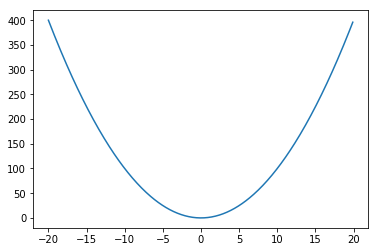

In [28]:
    import numpy as np
    import matplotlib.pyplot as plt

    x=np.arange(-20,20,0.1)
    y= x**2 
    plt.plot(x,y)
    plt.show()


------------------------
iteración  1
x =  2.5 , y =  7.25
------------------------
iteración  2
x =  1.875 , y =  4.515625
------------------------
iteración  3
x =  1.5234375 , y =  3.32086181640625
------------------------
iteración  4
x =  1.291351318359375 , y =  2.667588227428496
------------------------
iteración  5
x =  1.1245924956165254 , y =  2.264708281197005
------------------------
iteración  6
x =  0.998121667496825 , y =  1.9962468631266423
------------------------
iteración  7
x =  0.8984969811841608 , y =  1.8072968251970503
------------------------
iteración  8
x =  0.8177672986644557 , y =  1.668743354764961
------------------------
iteración  9
x =  0.7508929631879596 , y =  1.5638402421651945
------------------------
iteración  10
x =  0.6945089389714402 , y =  1.4823426663112356
------------------------
iteración  11
x =  0.6462746723403165 , y =  1.4176709521085835
------------------------
iteración  12
x =  0.6045075771294582 , y =  1.3654294108069278
---------

Text(0, 0.5, 'y')

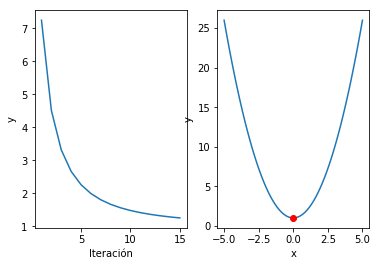

In [16]:
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy import linspace

# Ejemplo del gradiente descendente aplicado a la función y = x^2 + 1
# La ecuación matemática para el gradiente (derivada) es = 2*x

x_inicial = randint(10)
alpha = 0.1
n_iteraciones = 15

iteraciones = []
y = []

x = x_inicial
for i in range(n_iteraciones):
	print('------------------------')
	print('iteración ', str(i+1))

	# Calcular gradiente
	gradiente = x**2

	# Actualizar "x" usando gradiente descendente
	x = x - alpha*gradiente

	# Almacenar iteración y valor correspondiente
	y.append(x**2 + 1)
	iteraciones.append(i+1)

	# Imprimir resultados
	print('x = ', str(x), ', y = ', str(x**2+1))

plt.subplot(1,2,1)
plt.plot(iteraciones,y)
plt.xlabel('Iteración')
plt.ylabel('y')

X = linspace(-5,5,100)
Y = X**2 + 1
plt.subplot(1,2,2)
plt.plot(X,Y,0.0,1.0,'ro')
plt.xlabel('x')
plt.ylabel('y')